# Imports

In [1]:
#Import all the necessary python libraries
import pymzml
import csv
import os
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import json
from scipy.integrate import trapz

#Import all the necessary CLAW libraries
import create_directory
import CLAW
import matplotlib.pyplot as plt
import warnings

import OzESI_CLAW

import re
from sklearn.mixture import GaussianMixture
import tqdm

import OzESI_CLAW
import OzESI
import OzESI_plot
import OzESI_compare


#version 2
import OzESI_v2
from OzESI_plot_v2 import Plot
# Import the create_folder function from OzESI_utils
from OzESI_utils import create_folder

# Suppress all warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
name_of_project = 'AMP'


# Separate OzON and OzOFF mzml files incase they weren't seprated before

In [2]:
#After you load mzml files to mzml folder. this will filter the files and move them to o3on and o2only folders
create_directory.filter_o3mzml_files(name_of_project)

The directory 'Projects/AMP/mzml' does not exist. Please try again with a valid directory.


# Database location, CLAW preparsing setup - ON/OFF switch

In [3]:
# # Define the mode: 'ON' or 'OFF'
# mode = 'OFF'  # Change to 'OFF' as needed

# # Set default values based on the mode
# if mode == 'ON':
#     data_base_name_location = 'lipid_database/AMP_Database_OzON.xlsx'
#     Project = './Projects/'
#     Project_Name = 'AMP'
#     Project_Folder_data = f'{Project}{Project_Name}/fame_mix/on/'
#     Project_results = f'{Project}{Project_Name}/results/fame_mix/'
#     file_name_to_save = 'FAME'
#     tolerance = 0.3
#     remove_std = True
#     save_data = True
#     csv_data_folder = f'{Project_results}csv_data/'
#     base_plot_directory = f'Projects/{Project_Name}/results/plots/on/'
#     project_results_directory = f'Projects/{Project_Name}/results/fame_mix/'
#     save_df_name = 'fame_mix_ON.csv'
#     plots_directory = f'Projects/{Project_Name}/results/fame_mix/plots/on/'
#     file_name = 'fame_mix_ON.csv'
# else:
#     data_base_name_location = 'lipid_database/AMP_Database_OzOFF.xlsx'
#     Project = './Projects/'
#     Project_Name = 'AMP'
#     Project_Folder_data = f'{Project}{Project_Name}/fame_mix/off/'
#     Project_results = f'{Project}{Project_Name}/results/fame_mix/'
#     file_name_to_save = 'FAME'
#     tolerance = 0.3
#     remove_std = True
#     save_data = True
#     csv_data_folder = f'{Project_results}csv_data/'
#     base_plot_directory = f'Projects/{Project_Name}/results/plots/off/'
#     project_results_directory = f'Projects/{Project_Name}/results/fame_mix/'
#     save_df_name = 'fame_mix_OFF.csv'
#     plots_directory = f'Projects/{Project_Name}/results/fame_mix/plots/off/'
#     file_name = 'fame_mix_OFF.csv'



# # Save RawDataParser output CSV file
# output_csv = f"{csv_data_folder}{file_name_to_save}_RawDataParser_{mode}.csv"
# raw_data_csv = f"{csv_data_folder}{file_name_to_save}_RawDataParser_{mode}.csv"

# # Path to the PeakAnalysis output CSV file
# peak_analysis_csv = f"{csv_data_folder}{file_name_to_save}_PeakAnalysis_{mode}.csv"

# # Paths to the CSV files
# mrm_csv_path = f'{csv_data_folder}df_MRM_{mode}.csv'
# oze_esi_csv_path = f'{csv_data_folder}df_OzESI_{mode}.csv'


# # Path to OzoneCompare files
# ozone_compare_csv = f"{csv_data_folder}{file_name_to_save}_OzoneCompared.csv"


# # Call pre_parsing_setup to initialize the variables
# data_base_name_location, Project_Folder_data, Project_results, file_name_to_save, tolerance, remove_std, save_data = OzESI_CLAW.pre_parsing_setup(data_base_name_location,
#  Project, 
#  Project_Name, 
#  Project_Folder_data,
#  Project_results, 
#  file_name_to_save, 
#  tolerance, 
#  remove_std,
#  save_data)



### updated for ozone


In [4]:
# import pandas as pd
# import os
# from OzESI_compare import OzoneCompare
# from OzESI_plot_v2 import Plot

# # Define the mode: 'ON' or 'OFF'
# mode = 'ON'  # Change to 'ON' as needed

# # Set default values based on the mode
# if mode == 'ON':
#     data_base_name_location = 'lipid_database/AMP_Database_OzON.xlsx'
#     Project = './Projects/'
#     Project_Name = 'AMP'
#     Project_Folder_data = f'{Project}{Project_Name}/fame_mix/on/'
#     Project_results = f'{Project}{Project_Name}/results/fame_mix/'
#     file_name_to_save = 'FAME'
#     tolerance = 0.3
#     remove_std = True
#     save_data = True
#     csv_data_folder = f'{Project_results}csv_data/'
#     base_plot_directory = f'Projects/{Project_Name}/results/plots/on/'
#     project_results_directory = f'Projects/{Project_Name}/results/fame_mix/'
#     save_df_name = 'fame_mix_ON.csv'
#     plots_directory = f'Projects/{Project_Name}/results/fame_mix/plots/on/'
#     file_name = 'fame_mix_ON.csv'
# else:
#     data_base_name_location = 'lipid_database/AMP_Database_OzOFF.xlsx'
#     Project = './Projects/'
#     Project_Name = 'AMP'
#     Project_Folder_data = f'{Project}{Project_Name}/fame_mix/off/'
#     Project_results = f'{Project}{Project_Name}/results/fame_mix/'
#     file_name_to_save = 'FAME'
#     tolerance = 0.3
#     remove_std = True
#     save_data = True
#     csv_data_folder = f'{Project_results}csv_data/'
#     base_plot_directory = f'Projects/{Project_Name}/results/plots/off/'
#     project_results_directory = f'Projects/{Project_Name}/results/fame_mix/'
#     save_df_name = 'fame_mix_OFF.csv'
#     plots_directory = f'Projects/{Project_Name}/results/fame_mix/plots/off/'
#     file_name = 'fame_mix_OFF.csv'

# # Save RawDataParser output CSV file
# output_csv = f"{csv_data_folder}{file_name_to_save}_RawDataParser_{mode}.csv"
# raw_data_csv = f"{csv_data_folder}{file_name_to_save}_RawDataParser_{mode}.csv"

# # Path to the PeakAnalysis output CSV file
# peak_analysis_csv_on = f"{file_name_to_save}_PeakAnalysis_ON.csv"
# peak_analysis_csv_off = f"{file_name_to_save}_PeakAnalysis_OFF.csv"

# # Paths to the CSV files
# mrm_csv_path = f'{csv_data_folder}df_MRM_{mode}.csv'
# oze_esi_csv_path = f'{csv_data_folder}df_OzESI_{mode}.csv'

# # Path to OzoneCompare files
# ozone_compare_csv = f"{file_name_to_save}_OzoneCompared.csv"

# updated again for ozone

In [5]:
# Define the mode: 'ON' or 'OFF'
mode = 'ON'  # Change to 'ON' as needed

# Set default values based on the mode
if mode == 'ON':
    data_base_name_location = 'lipid_database/AMP_Database_OzON.xlsx'
    Project = './Projects/'
    Project_Name = 'AMP'
    Project_Folder_data = f'{Project}{Project_Name}/fame_mix/on/'
    Project_results = f'{Project}{Project_Name}/results/fame_mix/'
    file_name_to_save = 'FAME'
    tolerance = 0.3
    remove_std = True
    save_data = True
    csv_data_folder = f'{Project_results}csv_data/'
    base_plot_directory = f'Projects/{Project_Name}/results/plots/on/'
    project_results_directory = f'Projects/{Project_Name}/results/fame_mix/'
    save_df_name = 'fame_mix_ON.csv'
    plots_directory = f'Projects/{Project_Name}/results/fame_mix/plots/on/'
    file_name = 'fame_mix_ON.csv'
else:
    data_base_name_location = 'lipid_database/AMP_Database_OzOFF.xlsx'
    Project = './Projects/'
    Project_Name = 'AMP'
    Project_Folder_data = f'{Project}{Project_Name}/fame_mix/off/'
    Project_results = f'{Project}{Project_Name}/results/fame_mix/'
    file_name_to_save = 'FAME'
    tolerance = 0.3
    remove_std = True
    save_data = True
    csv_data_folder = f'{Project_results}csv_data/'
    base_plot_directory = f'Projects/{Project_Name}/results/plots/off/'
    project_results_directory = f'Projects/{Project_Name}/results/fame_mix/'
    save_df_name = 'fame_mix_OFF.csv'
    plots_directory = f'Projects/{Project_Name}/results/fame_mix/plots/off/'
    file_name = 'fame_mix_OFF.csv'



# Save RawDataParser output CSV file
output_csv = f"{csv_data_folder}{file_name_to_save}_RawDataParser_{mode}.csv"
raw_data_csv = f"{csv_data_folder}{file_name_to_save}_RawDataParser_{mode}.csv"

# Path to the PeakAnalysis output CSV file
peak_analysis_csv = f"{csv_data_folder}{file_name_to_save}_PeakAnalysis_{mode}.csv"

# Paths to the CSV files
mrm_csv_path = f'{csv_data_folder}df_MRM_{mode}.csv'
oze_esi_csv_path = f'{csv_data_folder}df_OzESI_{mode}.csv'


# Path to OzoneCompare files
ozone_compare_csv = f"{csv_data_folder}{file_name_to_save}_OzoneCompared.csv"


# Call pre_parsing_setup to initialize the variables
data_base_name_location, Project_Folder_data, Project_results, file_name_to_save, tolerance, remove_std, save_data = OzESI_CLAW.pre_parsing_setup(data_base_name_location,
 Project, 
 Project_Name, 
 Project_Folder_data,
 Project_results, 
 file_name_to_save, 
 tolerance, 
 remove_std,
 save_data)


# # Save RawDataParser output CSV file
# output_csv = f"{csv_data_folder}{file_name_to_save}_RawDataParser_{mode}.csv"
# raw_data_csv = f"{csv_data_folder}{file_name_to_save}_RawDataParser_{mode}.csv"

# Path to the PeakAnalysis output CSV file
peak_analysis_csv_on = f"{file_name_to_save}_PeakAnalysis_ON.csv"
peak_analysis_csv_off = f"{file_name_to_save}_PeakAnalysis_OFF.csv"
ozone_compare_csv = f'{file_name}_OzoneCompared.csv'

data_base_name_location: lipid_database/AMP_Database_OzON.xlsx
Project: ./Projects/
Project_Name: AMP
Project_Folder_data: ./Projects/AMP/fame_mix/on/
Project_results: ./Projects/AMP/results/fame_mix/
file_name_to_save: FAME
tolerance: 0.3
remove_std: True
save_data: True


# Database Location, Project Location, and CLAW Preparsing setup

# csv paths

In [6]:
# Define the retention time range and new columns
retention_time_range = (0, 15)
new_columns = {'Biology': ['cortex', 'dienc', 'hippo', 'cereb'],
               'Genotype': ['5xFAD', 'WT'],
               'Cage': ['FAD231', 'FAD259', 'FAD257', 'FAD263', 'FAD249', 'FAD246', 'FAD245'],
               'Mouse': ['m1', 'm2', 'm3', 'm4', 'm5']}
#group data
group_columns = ['Lipid', 'Sample_ID', 'Biology', 'Genotype', 'Mouse', 'Cage']

# OzESI setup

In [7]:


time_and_intensity_df, master_df, OzESI_time_df = OzESI_CLAW.create_analysis_dataframes()

# CLAW with OzESI

In [8]:
# Use the initialized variables as arguments to full_parse
df_MRM, df_OzESI = OzESI_CLAW.full_parse(data_base_name_location, 
                                               Project_Folder_data, 
                                               Project_results, 
                                               file_name_to_save, 
                                               tolerance, 
                                               remove_std=True, 
                                               save_data=False,
                                               batch_processing=True,
                                               plot_chromatogram=False)

/home/iyer95/CLAW/CLAW/lipid_platform/OzESI_CLAW.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/OzESI_CLAW.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/OzESI_CLAW.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

Finished parsing mzML file: ./Projects/AMP/fame_mix/on/11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3on_01.mzML

Finished parsing all mzML files



# Double check DFs

In [9]:
#save both df as csv files in Project_results/csv_data using pandas
df_MRM.to_csv(f'{csv_data_folder}df_MRM_{mode}.csv')
df_OzESI.to_csv(f'{csv_data_folder}df_OzESI_{mode}.csv')
df_MRM.head(None)
df_OzESI


,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
0,NaN,255.2,183.0,0.024400,41.320004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0
1,NaN,255.2,183.0,0.050617,41.300003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0
2,NaN,255.2,183.0,0.076850,41.300003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0
3,NaN,255.2,183.0,0.103083,41.320004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0
4,NaN,255.2,183.0,0.129317,54.620003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0
...,...,...,...,...,...,...,...
50900,NaN,533.5,183.0,24.606100,41.800003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0
50901,NaN,533.5,183.0,24.632333,41.280003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0
50902,NaN,533.5,183.0,24.658567,41.280003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0
50903,NaN,533.5,183.0,24.684800,41.220001,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0


# RawDataParser 
### Class for creating Match Group, extracting details from Sample ID, FAC and then parsing all the data and making a dataframe ready to be used to find peaks

In [10]:
import OzESI
import re

# Run RawDataParser
### 

/home/iyer95/CLAW/CLAW/lipid_platform/OzESI_v2.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Match_Group'] = df.groupby(['Parent_Ion', 'Product_Ion', 'Sample_ID']).ngroup()


Directory already exists at Projects/AMP/results/fame_mix/csv_data/
Directory already exists at Projects/AMP/results/fame_mix/csv_data/


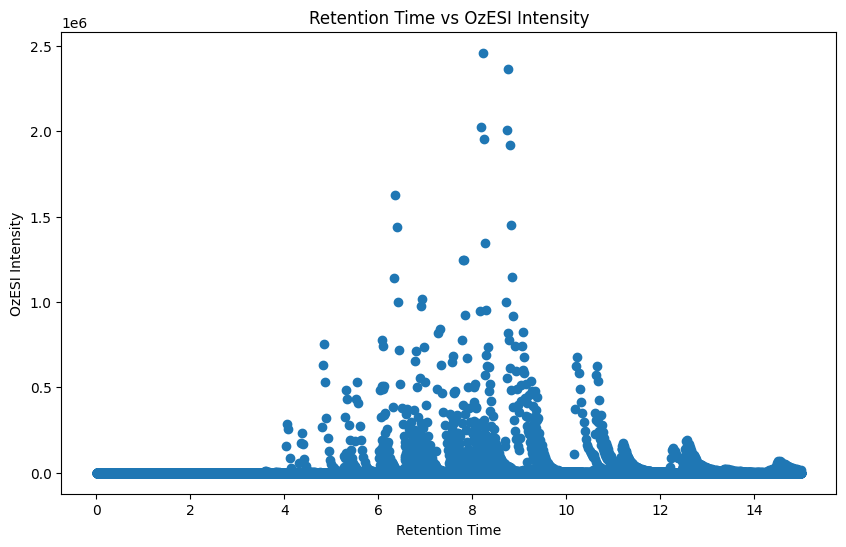

In [11]:
parser = OzESI_v2.RawDataParser(mrm_csv_path, oze_esi_csv_path)


# Parse the data
parsed_data = parser.parse_data(retention_time_range, new_columns, group_columns, project_results_directory, file_name_to_save, mode)

# Save raw data
save_status = parser.save_raw_data(project_results_directory, file_name_to_save, mode)

# Plot the full spectrum
parser.plot_full_spectrum(raw_data_csv)

# Plot the full spectrum

In [12]:
# Print the parsed data
print(parsed_data)



RawDataParser complete, output saved to Projects/AMP/results/fame_mix/csv_data/FAME_RawDataParser_ON.csv


# PeakAnalysis Class
### find peaks, RT and peak area 
### input df from RawDataParser and output is df

In [13]:

# Create an instance of PeakAnalysis
peak_analysis = OzESI_v2.PeakAnalysis(raw_data_csv, mode)

# Perform peak analysis
peaks_df = peak_analysis.find_lipid_peaks(use_match_group=True, height=50000, width=2, rel_height=0.5, project_results=Project_results, file_name_to_save=file_name_to_save, user_input=mode)


Sampling Interval: 0.0262166666666666
Sampling Interval: 0.026233333333333303
Group_Sample: -1 - Peak 0: Start Time = 7.526583333333334, End Time = 7.631516666666667, Width = 0.10493333333333332, FWHM = 0.08997482079019525
Sampling Interval: 0.026233333333333296
Group_Sample: -1 - Peak 0: Start Time = 6.634216666666667, End Time = 6.73915, Width = 0.10493333333333332, FWHM = 0.09153619244746856
Group_Sample: -1 - Peak 1: Start Time = 7.578600000000001, End Time = 7.6573, Width = 0.07869999999999955, FWHM = 0.0976283883750349
Sampling Interval: 0.0262166666666667
Group_Sample: -1 - Peak 0: Start Time = 6.633766666666667, End Time = 6.738700000000001, Width = 0.10493333333333332, FWHM = 0.0939969138572171
Group_Sample: -1 - Peak 1: Start Time = 7.57815, End Time = 7.683083333333333, Width = 0.10493333333333332, FWHM = 0.0996088517830315
Sampling Interval: 0.026216666666666704
Group_Sample: -1 - Peak 0: Start Time = 6.738250000000001, End Time = 6.843183333333334, Width = 0.10493333333333

In [14]:
peaks_df

############### WRITE A FUNCTION TO EASILY SCAN FOR SPECIFIC LIPIDS AN FIND THEIR MATCH GROUP OR GORUP SAMPLE
########## DOUBLE CHECK AREA CALCULATION

,Lipid,Retention_Time,OzESI_Intensity,Match_Group,Group_Sample,Sample_ID,Parent_Ion,Product_Ion,FAC,Biology,Genotype,Cage,Mouse,Peak_Height,FWHM,Peak_Width,Peak_Area
0,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3,n-6,n-9,n-12,n...",7.579050,64931.144531,1,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,269.1,183.0,"['22:6', '12:1', '13:1', '14:1', '15:1', '16:1...",NaN,NaN,NaN,NaN,64931.144531,0.089975,0.104933,6813.441433
1,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",6.686683,64325.605469,2,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1,183.0,"['6:0', '20:5', '20:4', '12:1', '13:1', '14:1'...",NaN,NaN,NaN,NaN,64325.605469,0.091536,0.104933,6749.900201
2,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",7.631067,91986.468750,2,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1,183.0,"['6:0', '20:5', '20:4', '12:1', '13:1', '14:1'...",NaN,NaN,NaN,NaN,91986.468750,0.097628,0.078700,7239.335091
3,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",6.686233,70811.421875,3,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.3,183.0,"['6:0', '20:5', '20:4', '12:1', '13:1', '14:1'...",NaN,NaN,NaN,NaN,70811.421875,0.093997,0.104933,7430.478535
4,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",7.630617,105181.585938,3,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.3,183.0,"['6:0', '20:5', '20:4', '12:1', '13:1', '14:1'...",NaN,NaN,NaN,NaN,105181.585938,0.099609,0.104933,11037.054418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,20:1,10.655467,625269.312500,43,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,477.4,183.0,['20:1'],NaN,NaN,NaN,NaN,625269.312500,0.145964,0.157400,98417.389788
79,20:0 / 21:1n-2 / 22:1n-3,12.281450,147127.203125,44,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,479.4,183.0,"['20:0', '21:1', '22:1']",NaN,NaN,NaN,NaN,147127.203125,0.226471,0.236100,34736.732658
80,22:6,7.584817,314451.750000,46,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,495.4,183.0,['22:6'],NaN,NaN,NaN,NaN,314451.750000,0.092633,0.078700,24747.352725
81,22:2,11.204517,164623.828125,47,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,503.4,183.0,['22:2'],NaN,NaN,NaN,NaN,164623.828125,0.162672,0.157383,25909.046816


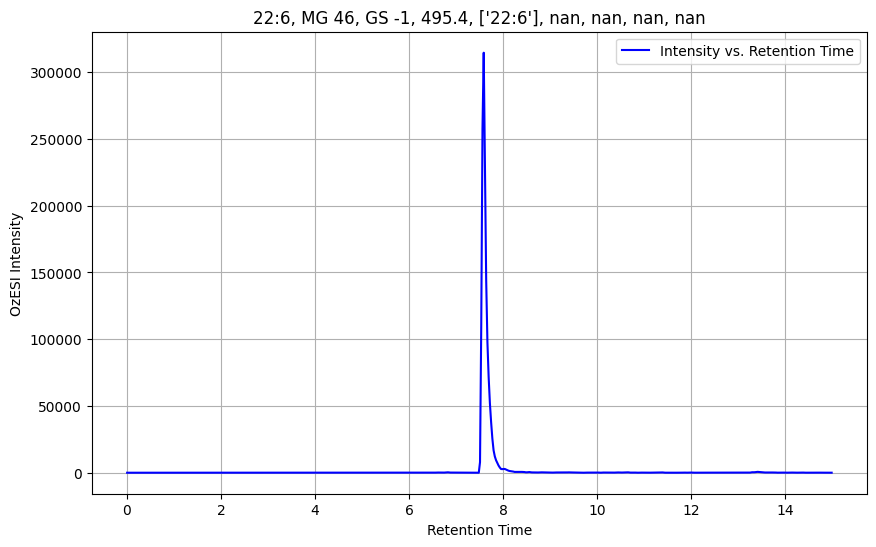

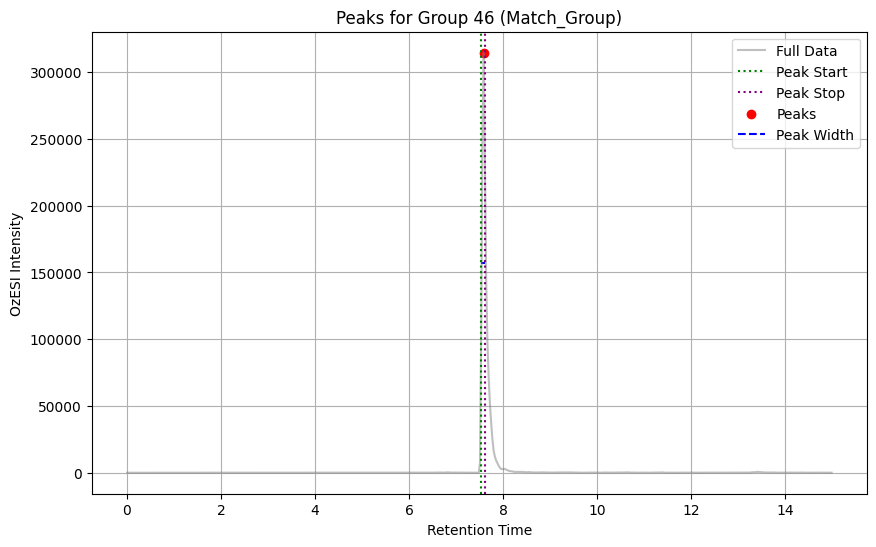

In [15]:

# Plot data and peaks for a specific group
peak_analysis.plot_data_and_peaks(raw_data_csv, peak_analysis_csv,group_type='Match_Group', group_value=46, height=50000, width=2, rel_height=0.5)

In [16]:
peaks_df

,Lipid,Retention_Time,OzESI_Intensity,Match_Group,Group_Sample,Sample_ID,Parent_Ion,Product_Ion,FAC,Biology,Genotype,Cage,Mouse,Peak_Height,FWHM,Peak_Width,Peak_Area
0,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3,n-6,n-9,n-12,n...",7.579050,64931.144531,1,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,269.1,183.0,"['22:6', '12:1', '13:1', '14:1', '15:1', '16:1...",NaN,NaN,NaN,NaN,64931.144531,0.089975,0.104933,6813.441433
1,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",6.686683,64325.605469,2,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1,183.0,"['6:0', '20:5', '20:4', '12:1', '13:1', '14:1'...",NaN,NaN,NaN,NaN,64325.605469,0.091536,0.104933,6749.900201
2,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",7.631067,91986.468750,2,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1,183.0,"['6:0', '20:5', '20:4', '12:1', '13:1', '14:1'...",NaN,NaN,NaN,NaN,91986.468750,0.097628,0.078700,7239.335091
3,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",6.686233,70811.421875,3,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.3,183.0,"['6:0', '20:5', '20:4', '12:1', '13:1', '14:1'...",NaN,NaN,NaN,NaN,70811.421875,0.093997,0.104933,7430.478535
4,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",7.630617,105181.585938,3,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.3,183.0,"['6:0', '20:5', '20:4', '12:1', '13:1', '14:1'...",NaN,NaN,NaN,NaN,105181.585938,0.099609,0.104933,11037.054418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,20:1,10.655467,625269.312500,43,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,477.4,183.0,['20:1'],NaN,NaN,NaN,NaN,625269.312500,0.145964,0.157400,98417.389788
79,20:0 / 21:1n-2 / 22:1n-3,12.281450,147127.203125,44,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,479.4,183.0,"['20:0', '21:1', '22:1']",NaN,NaN,NaN,NaN,147127.203125,0.226471,0.236100,34736.732658
80,22:6,7.584817,314451.750000,46,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,495.4,183.0,['22:6'],NaN,NaN,NaN,NaN,314451.750000,0.092633,0.078700,24747.352725
81,22:2,11.204517,164623.828125,47,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,503.4,183.0,['22:2'],NaN,NaN,NaN,NaN,164623.828125,0.162672,0.157383,25909.046816


# PLOT TO TEST

In [17]:
# import OzESI_plot

# # # Define the directory where the plots should be saved
# # plots_directory = 'Projects/AMP/results/fame_mix/plots/on/'

# # Create an instance of the Plot class with the specified directory
# plot_instance = OzESI_plot.Plot(dataframe=peaks_df, plot_directory=plots_directory)

# # Call the scatter method to plot data
# plot_instance.scatter()

# # Call the plot_bar method to display bar charts
# plot_instance.plot_bar()

# PLOT TEST CSV

In [18]:
# import pandas as pd
# from OzESI_plot_v2 import Plot

In [19]:

# # Load one of the CSV files into a DataFrame
# dataframe_choice = 'peak_analysis'  # or 'ozone_compare' based on user selection


# if dataframe_choice == 'peak_analysis':
#     dataframe = pd.read_csv(peak_analysis_csv)
# elif dataframe_choice == 'ozone_compare':
#     dataframe = pd.read_csv(ozone_compare_csv)
# else:
#     raise ValueError("Invalid dataframe choice")

# # # Specify the directory for saving plots
# # plot_directory = f'./Projects/{Project_Name}/results/fame_mix/plots/on/'

# # Create a Plot instance
# plot_instance = Plot(dataframe, plots_directory)

# # Generate and display plots
# plot_instance.scatter()
# plot_instance.plot_bar()
# plot_instance.plot_bar_by_group_sample()

# ADD OZONE COMPARE BELOW LATER

############################################

In [20]:
import pandas as pd
from OzESI_compare import OzoneCompare
# Create an instance of OzoneCompare

# Paths to the ON and OFF CSV files
peak_analysis_csv_on = f"{file_name_to_save}_PeakAnalysis_ON.csv"
peak_analysis_csv_off = f"{file_name_to_save}_PeakAnalysis_OFF.csv"





# Path to OzoneCompare output file
ozone_compare_csv = f"{file_name_to_save}_OzoneCompared.csv"

# Print the paths of each input being used
print(f"CSV data folder: {csv_data_folder}")
print(f"Peak Analysis ON file: {os.path.join(csv_data_folder, peak_analysis_csv_on)}")
print(f"Peak Analysis OFF file: {os.path.join(csv_data_folder, peak_analysis_csv_off)}")
print(f"Ozone Compare output file: {os.path.join(csv_data_folder, ozone_compare_csv)}")

# Create an instance of OzoneCompare
ozone_compare = OzoneCompare(csv_data_folder, peak_analysis_csv_on, peak_analysis_csv_off, ozone_compare_csv)

# Match the dataframes
matched_df = ozone_compare.match_dataframes()

# Filter the matched DataFrame if needed
filtered_df = ozone_compare.filter_contains_colon_zero(matched_df)

# Save the matched DataFrame to a CSV file
ozone_compare.save_matched_data(filtered_df)

# Print the path where the Ozone matched CSV file was saved
output_path = os.path.join(csv_data_folder, ozone_compare_csv)
print(f"Process completed. Matched data saved to {output_path}")



CSV data folder: ./Projects/AMP/results/fame_mix/csv_data/
Peak Analysis ON file: ./Projects/AMP/results/fame_mix/csv_data/FAME_PeakAnalysis_ON.csv
Peak Analysis OFF file: ./Projects/AMP/results/fame_mix/csv_data/FAME_PeakAnalysis_OFF.csv
Ozone Compare output file: ./Projects/AMP/results/fame_mix/csv_data/FAME_OzoneCompared.csv
Loaded ON data:                                                Lipid  Retention_Time  \
0  22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3,n-6,n-9,n-12,n...        7.579050   
1  6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...        6.686683   
2  6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...        7.631067   
3  6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...        6.686233   
4  6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...        7.630617   

   OzESI_Intensity  Match_Group  Group_Sample  \
0     64931.144531            1            -1   
1     64325.605469            2            -1   
2     91986.468750            2            -1   
3     70811.421875       

Matched data:                                                Lipid  Retention_Time  \
0  22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3,n-6,n-9,n-12,n...        7.579050   
1  22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3,n-6,n-9,n-12,n...        7.579050   
2  6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...        6.686683   
3  6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...        6.686683   
4  6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...        7.631067   

   OzESI_Intensity Match_Group Group_Sample  \
0     64931.144531           1           -1   
1     64931.144531           1           -1   
2     64325.605469           2           -1   
3     64325.605469           2           -1   
4     91986.468750           2           -1   

                                           Sample_ID  Parent_Ion  Product_Ion  \
0  11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...       269.1        183.0   
1  11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...       269.1        183.0   
2  11152023_FAMEmix_AMP_100

## PLOTS WITH OZONE COMPARE

CSV file path: ./Projects/AMP/results/fame_mix/csv_data/FAME_OzoneCompared.csv
Loaded DataFrame with 105 rows and 19 columns.
DataFrame columns: Index(['Lipid', 'Retention_Time', 'OzESI_Intensity', 'Match_Group',
       'Group_Sample', 'Sample_ID', 'Parent_Ion', 'Product_Ion', 'FAC',
       'Biology', 'Genotype', 'Cage', 'Mouse', 'Peak_Height', 'FWHM',
       'Peak_Width', 'Peak_Area', 'FAC_OFF', 'Retention_Time_OFF'],
      dtype='object')
Directory already exists at Projects/AMP/results/fame_mix/plots/on/


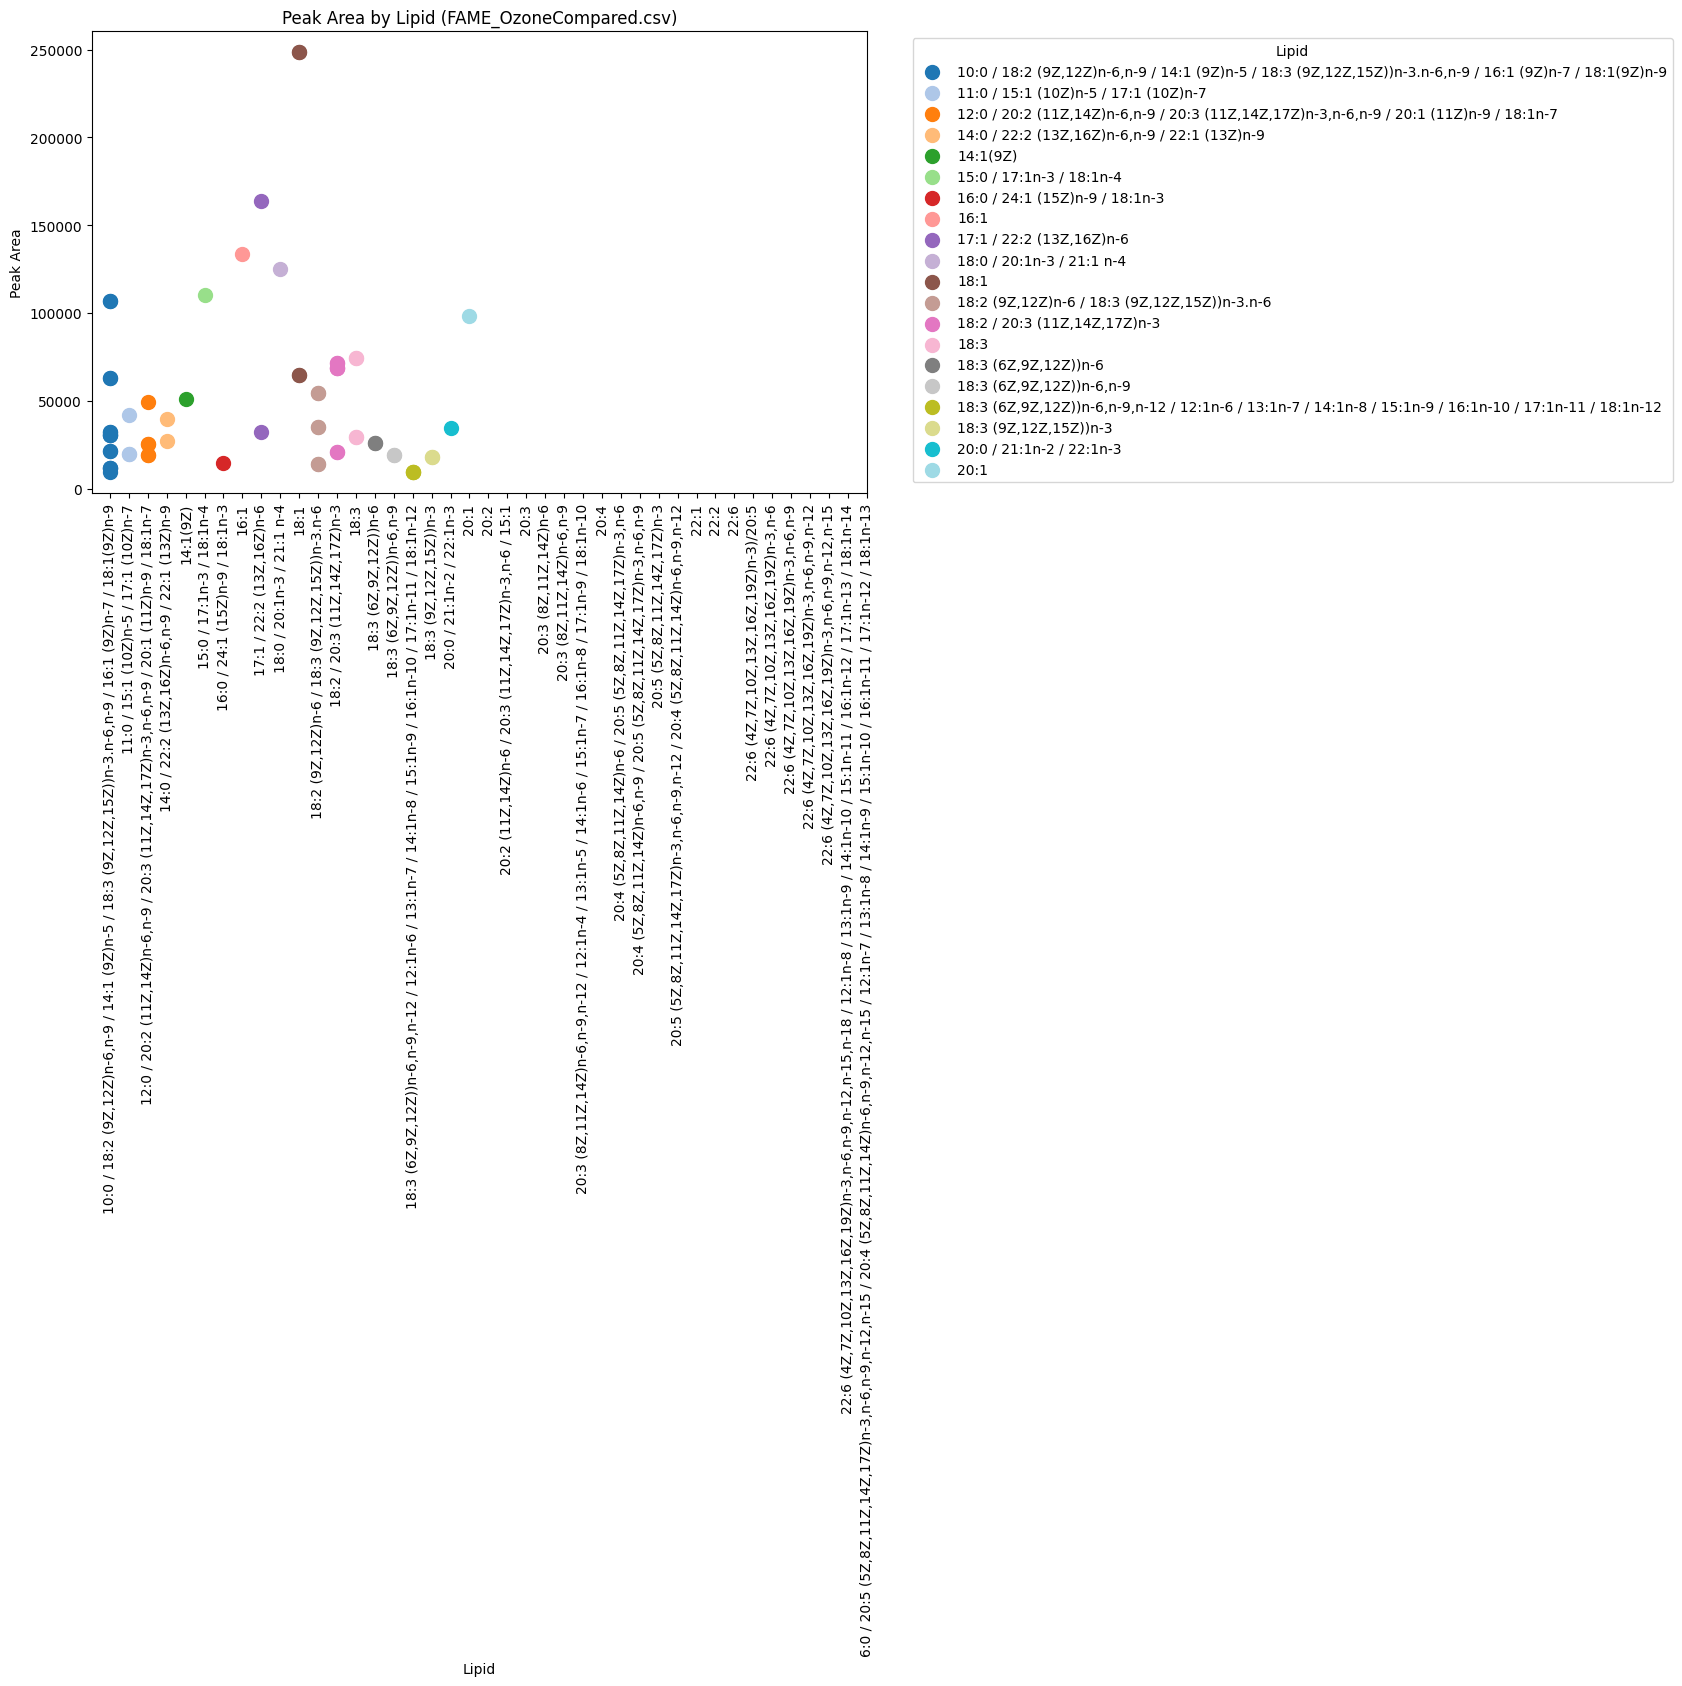

CSV file path: ./Projects/AMP/results/fame_mix/csv_data/FAME_OzoneCompared.csv
Loaded DataFrame with 105 rows and 19 columns.
DataFrame columns: Index(['Lipid', 'Retention_Time', 'OzESI_Intensity', 'Match_Group',
       'Group_Sample', 'Sample_ID', 'Parent_Ion', 'Product_Ion', 'FAC',
       'Biology', 'Genotype', 'Cage', 'Mouse', 'Peak_Height', 'FWHM',
       'Peak_Width', 'Peak_Area', 'FAC_OFF', 'Retention_Time_OFF'],
      dtype='object')
Directory already exists at Projects/AMP/results/fame_mix/plots/on/


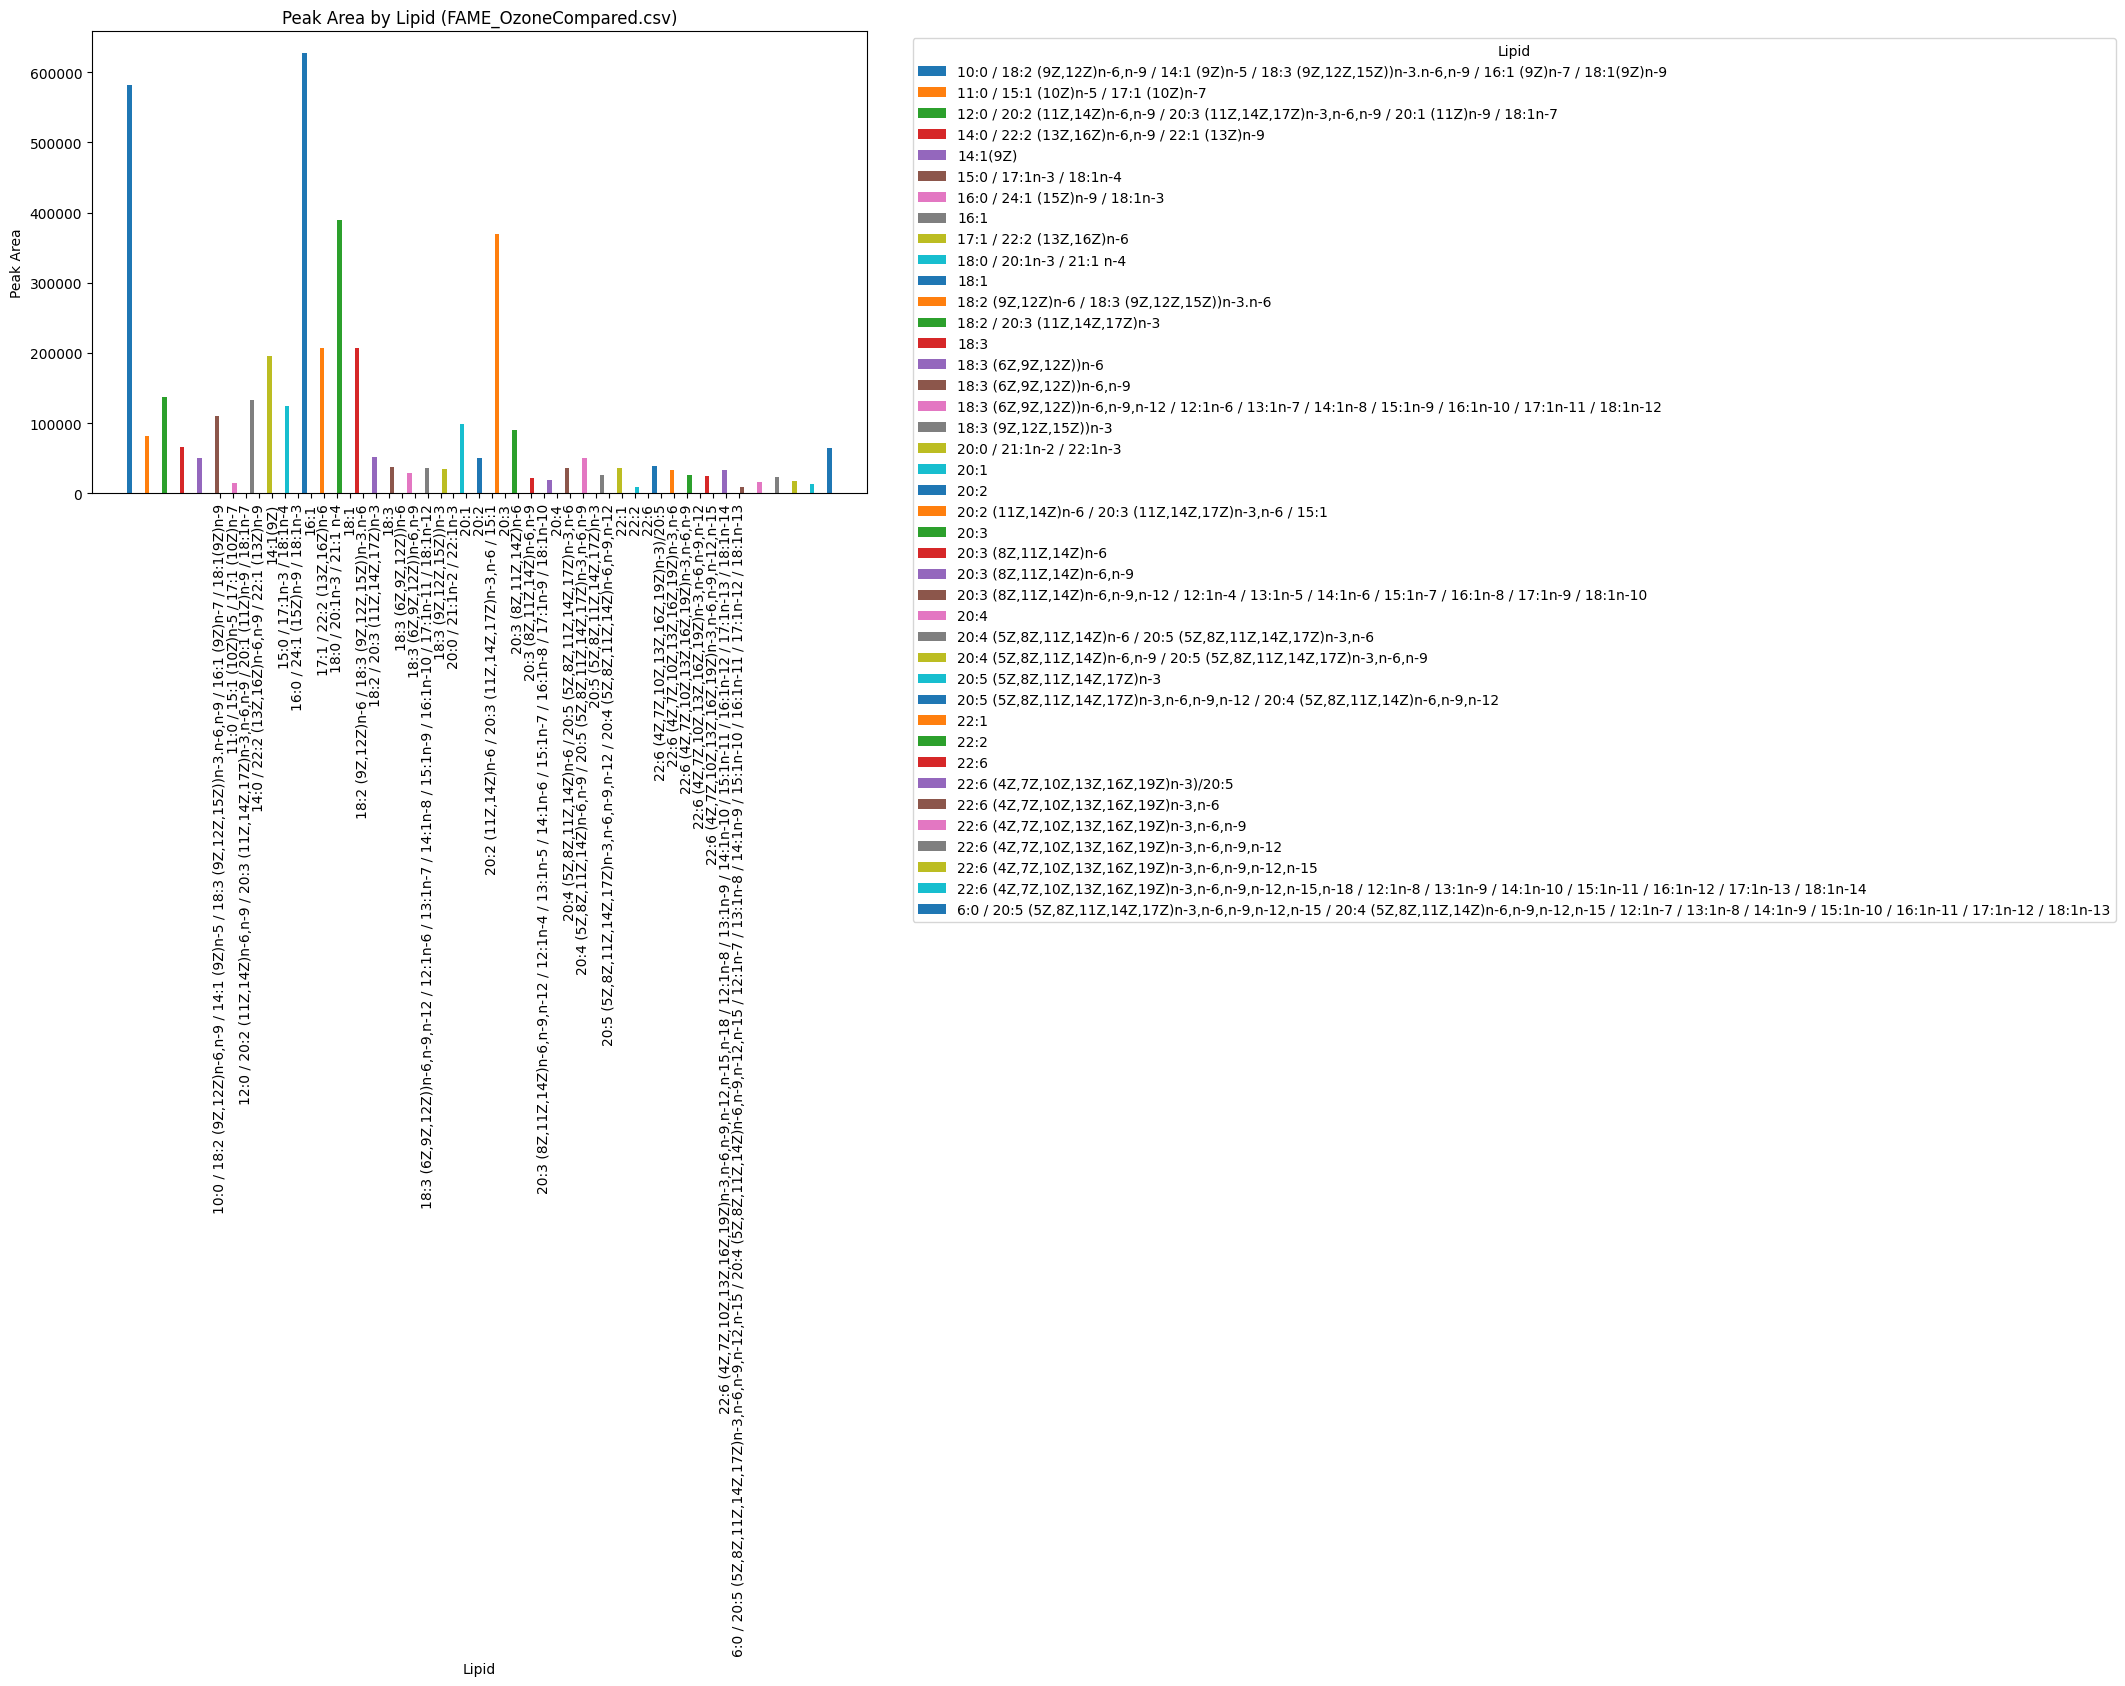

No handles with labels found to put in legend.


CSV file path: ./Projects/AMP/results/fame_mix/csv_data/FAME_OzoneCompared.csv
Loaded DataFrame with 105 rows and 19 columns.
DataFrame columns: Index(['Lipid', 'Retention_Time', 'OzESI_Intensity', 'Match_Group',
       'Group_Sample', 'Sample_ID', 'Parent_Ion', 'Product_Ion', 'FAC',
       'Biology', 'Genotype', 'Cage', 'Mouse', 'Peak_Height', 'FWHM',
       'Peak_Width', 'Peak_Area', 'FAC_OFF', 'Retention_Time_OFF'],
      dtype='object')
Directory already exists at Projects/AMP/results/fame_mix/plots/on/


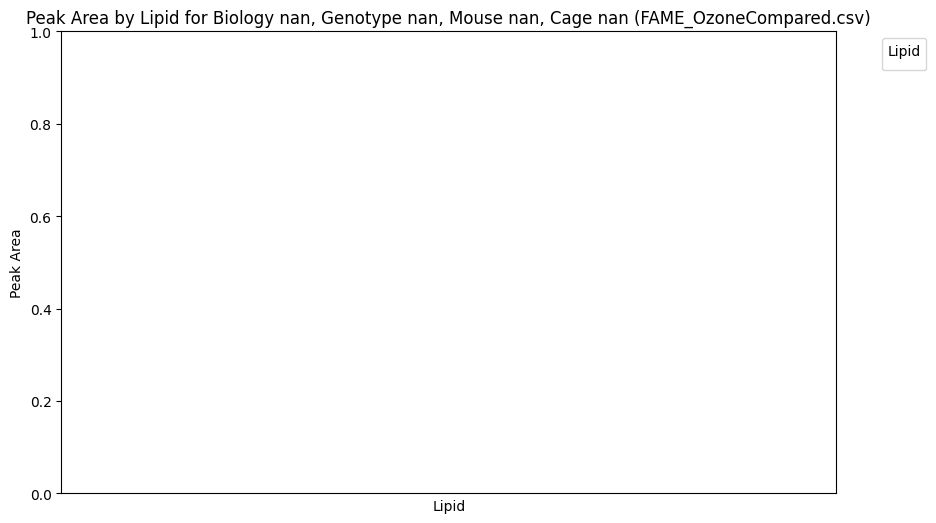

In [21]:
# # Define the mode: 'ON' or 'OFF'
# mode = 'ON'  # Change to 'ON' as needed

# # Set default values based on the mode
# if mode == 'ON':
#     data_base_name_location = 'lipid_database/AMP_Database_OzON.xlsx'
#     Project = './Projects/'
#     Project_Name = 'AMP'
#     Project_Folder_data = f'{Project}{Project_Name}/fame_mix/on/'
#     Project_results = f'{Project}{Project_Name}/results/fame_mix/'
#     file_name_to_save = 'FAME'
#     tolerance = 0.3
#     remove_std = True
#     save_data = True
#     csv_data_folder = f'{Project_results}csv_data/'
#     base_plot_directory = f'Projects/{Project_Name}/results/plots/on/'
#     project_results_directory = f'Projects/{Project_Name}/results/fame_mix/'
#     save_df_name = 'fame_mix_ON.csv'
#     plots_directory = f'Projects/{Project_Name}/results/fame_mix/plots/on/'
#     file_name = 'fame_mix_ON.csv'
# else:
#     data_base_name_location = 'lipid_database/AMP_Database_OzOFF.xlsx'
#     Project = './Projects/'
#     Project_Name = 'AMP'
#     Project_Folder_data = f'{Project}{Project_Name}/fame_mix/off/'
#     Project_results = f'{Project}{Project_Name}/results/fame_mix/'
#     file_name_to_save = 'FAME'
#     tolerance = 0.3
#     remove_std = True
#     save_data = True
#     csv_data_folder = f'{Project_results}csv_data/'
#     base_plot_directory = f'Projects/{Project_Name}/results/plots/off/'
#     project_results_directory = f'Projects/{Project_Name}/results/fame_mix/'
#     save_df_name = 'fame_mix_OFF.csv'
#     plots_directory = f'Projects/{Project_Name}/results/fame_mix/plots/off/'
#     file_name = 'fame_mix_OFF.csv'

# # Save RawDataParser output CSV file
# output_csv = f"{csv_data_folder}{file_name_to_save}_RawDataParser_{mode}.csv"
# raw_data_csv = f"{csv_data_folder}{file_name_to_save}_RawDataParser_{mode}.csv"

# # Path to the PeakAnalysis output CSV file
# peak_analysis_csv_on = f"{file_name_to_save}_PeakAnalysis_ON.csv"
# peak_analysis_csv_off = f"{file_name_to_save}_PeakAnalysis_OFF.csv"
# ozone_compare_csv = 'FAME_OzoneCompared.csv'

# Initialize the Plot class
plotter = Plot(csv_data_folder, peak_analysis_csv_on, peak_analysis_csv_off, ozone_compare_csv, plots_directory)

# Create a scatter plot with use_ozone_compare argument
plotter.scatter(use_ozone_compare=True, mode=mode)

# Create a bar plot with use_ozone_compare argument
plotter.plot_bar(use_ozone_compare=True, mode=mode)

# Create bar plots by group sample with use_ozone_compare argument
plotter.plot_bar_by_group_sample(use_ozone_compare=True, mode=mode)


# OzoneCompare Class
### Input OzOFF and OzON df
### Match FAC and RT in OzON to those in OzOFF

In [19]:
# main_script.py

# Import the OzoneCompare class
from OzESI_compare_v2 import OzoneCompare

# Define the directory and file names
directory = './Projects/AMP/results/test3/csv_data/'
file_name_on = 'AMP_PeakAnalysis_ON.csv'
file_name_off = 'AMP_PeakAnalysis_OFF.csv'

# Initialize OzoneCompare with the directory and file names
ozone_compare = OzoneCompare(directory, file_name_on, file_name_off)

# Match the dataframes
matched_df = ozone_compare.match_dataframes()

# Print matched data for a specific match group
match_group = 1  # Replace with the actual match group value you want to check
ozone_compare.print_fac_and_off_match(matched_df, match_group)

# Filter the matched dataframe to exclude rows containing ':0' in FAC_OFF
filtered_df = ozone_compare.filter_contains_colon_zero(matched_df)

# Print the filtered dataframe
print(filtered_df)


No entries found for Match Group 1.
                                                  Lipid  Retention_Time  \
1     8:0 / 12:1n-5 / 13:1n-6 / 14:1n-7 / 15:1n-8 / ...        3.601983   
2     8:0 / 12:1n-5 / 13:1n-6 / 14:1n-7 / 15:1n-8 / ...        3.601983   
3     8:0 / 12:1n-5 / 13:1n-6 / 14:1n-7 / 15:1n-8 / ...        3.601983   
4     8:0 / 12:1n-5 / 13:1n-6 / 14:1n-7 / 15:1n-8 / ...        3.601983   
5     8:0 / 12:1n-5 / 13:1n-6 / 14:1n-7 / 15:1n-8 / ...        3.601983   
...                                                 ...             ...   
2143              22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5        5.869233   
2144              22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5        5.869233   
2145              22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5        5.869233   
2146              22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5        5.869233   
2147              22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5        5.869233   

      OzESI_Intensity Match_Group Group_Sample  \
1       17577

In [20]:
filtered_df

,Lipid,Retention_Time,OzESI_Intensity,Match_Group,Group_Sample,Sample_ID,Parent_Ion,Product_Ion,FAC,Biology,Genotype,Cage,Mouse,Peak_Height,FWHM,Peak_Width,Peak_Area,FAC_OFF,Retention_Time_OFF
1,8:0 / 12:1n-5 / 13:1n-6 / 14:1n-7 / 15:1n-8 / ...,3.601983,175778.109375,28,208,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,311.3,183.0,"['8:0', '12:1', '13:1', '14:1', '15:1', '16:1'...",cereb,5xFAD,FAD257,m2,175778.109375,87909.784689,4.665065,820016.306490,12:1,3.601983
2,8:0 / 12:1n-5 / 13:1n-6 / 14:1n-7 / 15:1n-8 / ...,3.601983,175778.109375,28,208,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,311.3,183.0,"['8:0', '12:1', '13:1', '14:1', '15:1', '16:1'...",cereb,5xFAD,FAD257,m2,175778.109375,87909.784689,4.665065,820016.306490,13:1,3.601983
3,8:0 / 12:1n-5 / 13:1n-6 / 14:1n-7 / 15:1n-8 / ...,3.601983,175778.109375,28,208,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,311.3,183.0,"['8:0', '12:1', '13:1', '14:1', '15:1', '16:1'...",cereb,5xFAD,FAD257,m2,175778.109375,87909.784689,4.665065,820016.306490,14:1,3.601983
4,8:0 / 12:1n-5 / 13:1n-6 / 14:1n-7 / 15:1n-8 / ...,3.601983,175778.109375,28,208,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,311.3,183.0,"['8:0', '12:1', '13:1', '14:1', '15:1', '16:1'...",cereb,5xFAD,FAD257,m2,175778.109375,87909.784689,4.665065,820016.306490,15:1,3.601983
5,8:0 / 12:1n-5 / 13:1n-6 / 14:1n-7 / 15:1n-8 / ...,3.601983,175778.109375,28,208,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,311.3,183.0,"['8:0', '12:1', '13:1', '14:1', '15:1', '16:1'...",cereb,5xFAD,FAD257,m2,175778.109375,87909.784689,4.665065,820016.306490,16:1,3.601983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5",5.869233,68034.601562,163,167,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,469.4,183.0,"['22:6', '20:5']",dienc,5xFAD,FAD257,m2,68034.601562,34038.080782,5.831340,396732.893145,20:5,5.882133
2144,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5",5.869233,68034.601562,163,167,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,469.4,183.0,"['22:6', '20:5']",dienc,5xFAD,FAD257,m2,68034.601562,34038.080782,5.831340,396732.893145,22:6,5.882133
2145,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5",5.869233,68034.601562,163,167,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,469.4,183.0,"['22:6', '20:5']",dienc,5xFAD,FAD257,m2,68034.601562,34038.080782,5.831340,396732.893145,20:5,5.882133
2146,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5",5.869233,68034.601562,163,167,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,469.4,183.0,"['22:6', '20:5']",dienc,5xFAD,FAD257,m2,68034.601562,34038.080782,5.831340,396732.893145,22:6,5.869233


Directory already exists at Projects/AMP/results/test3/plots/on/


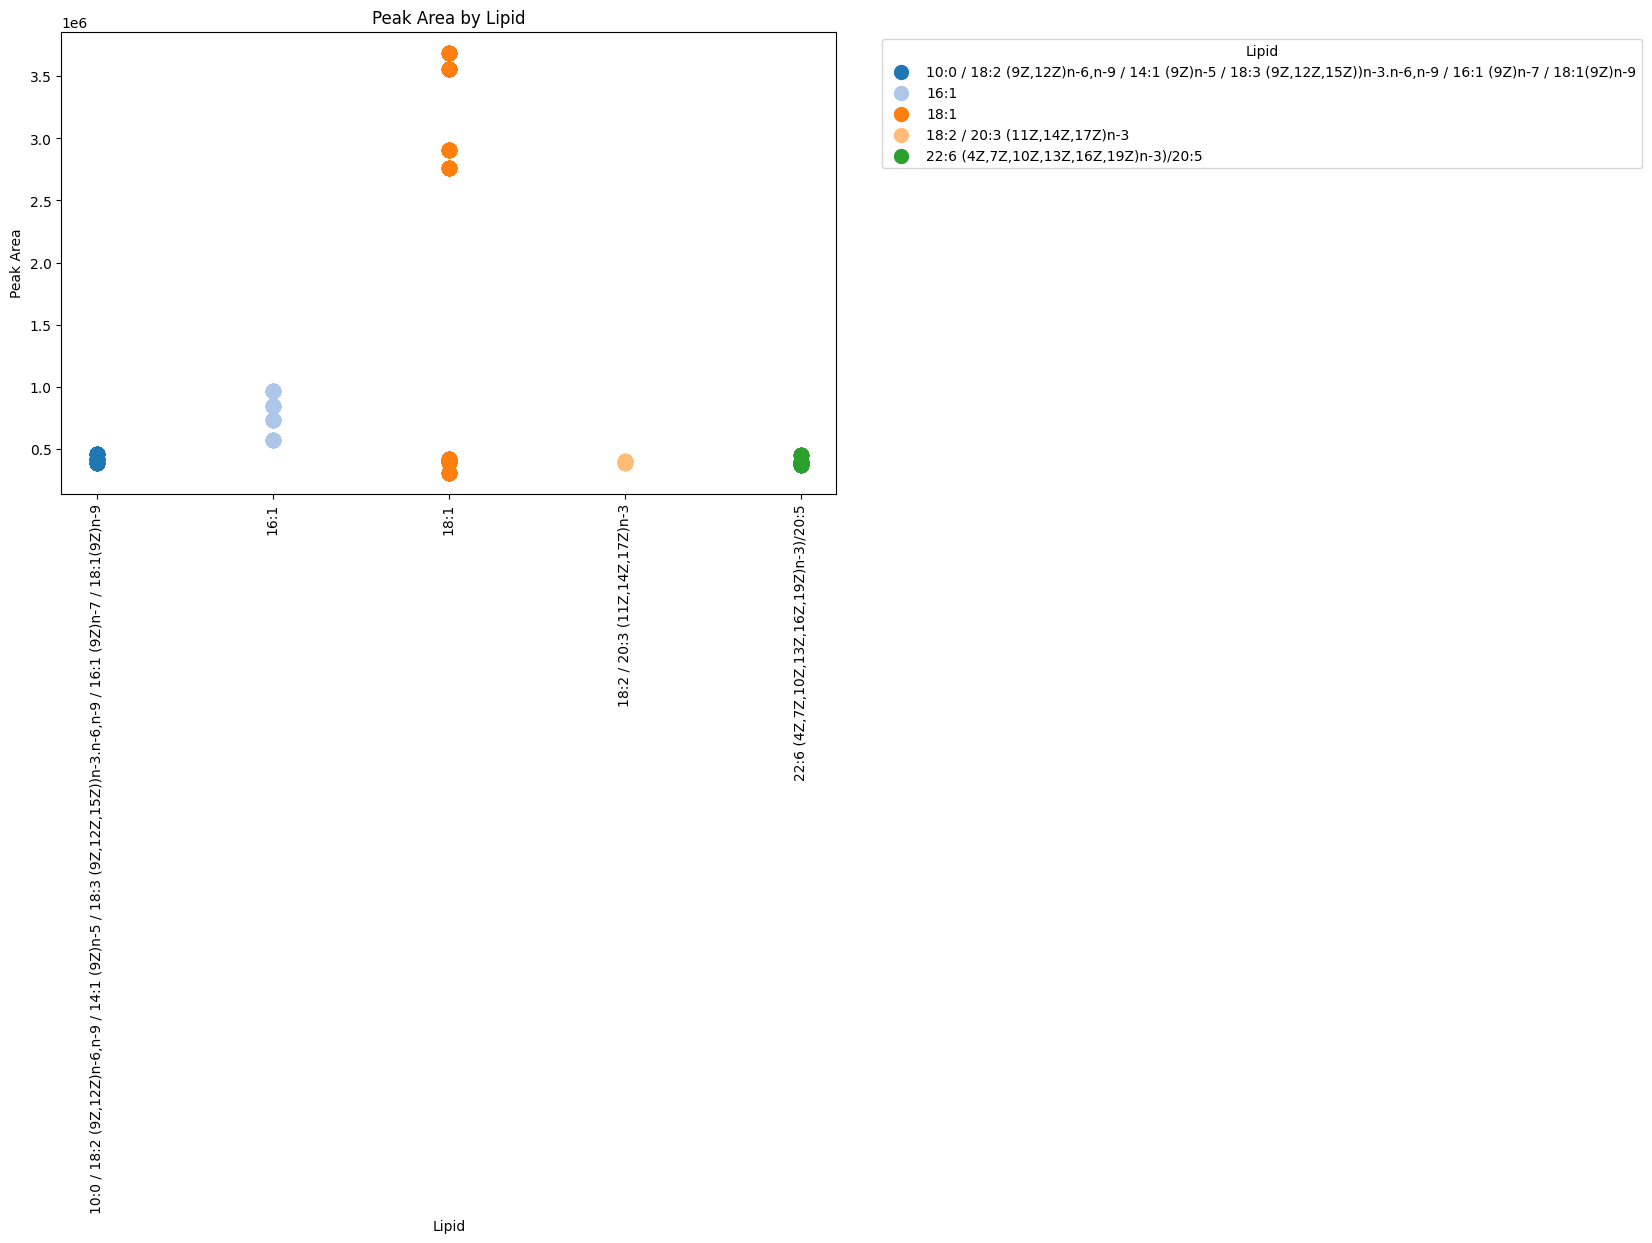

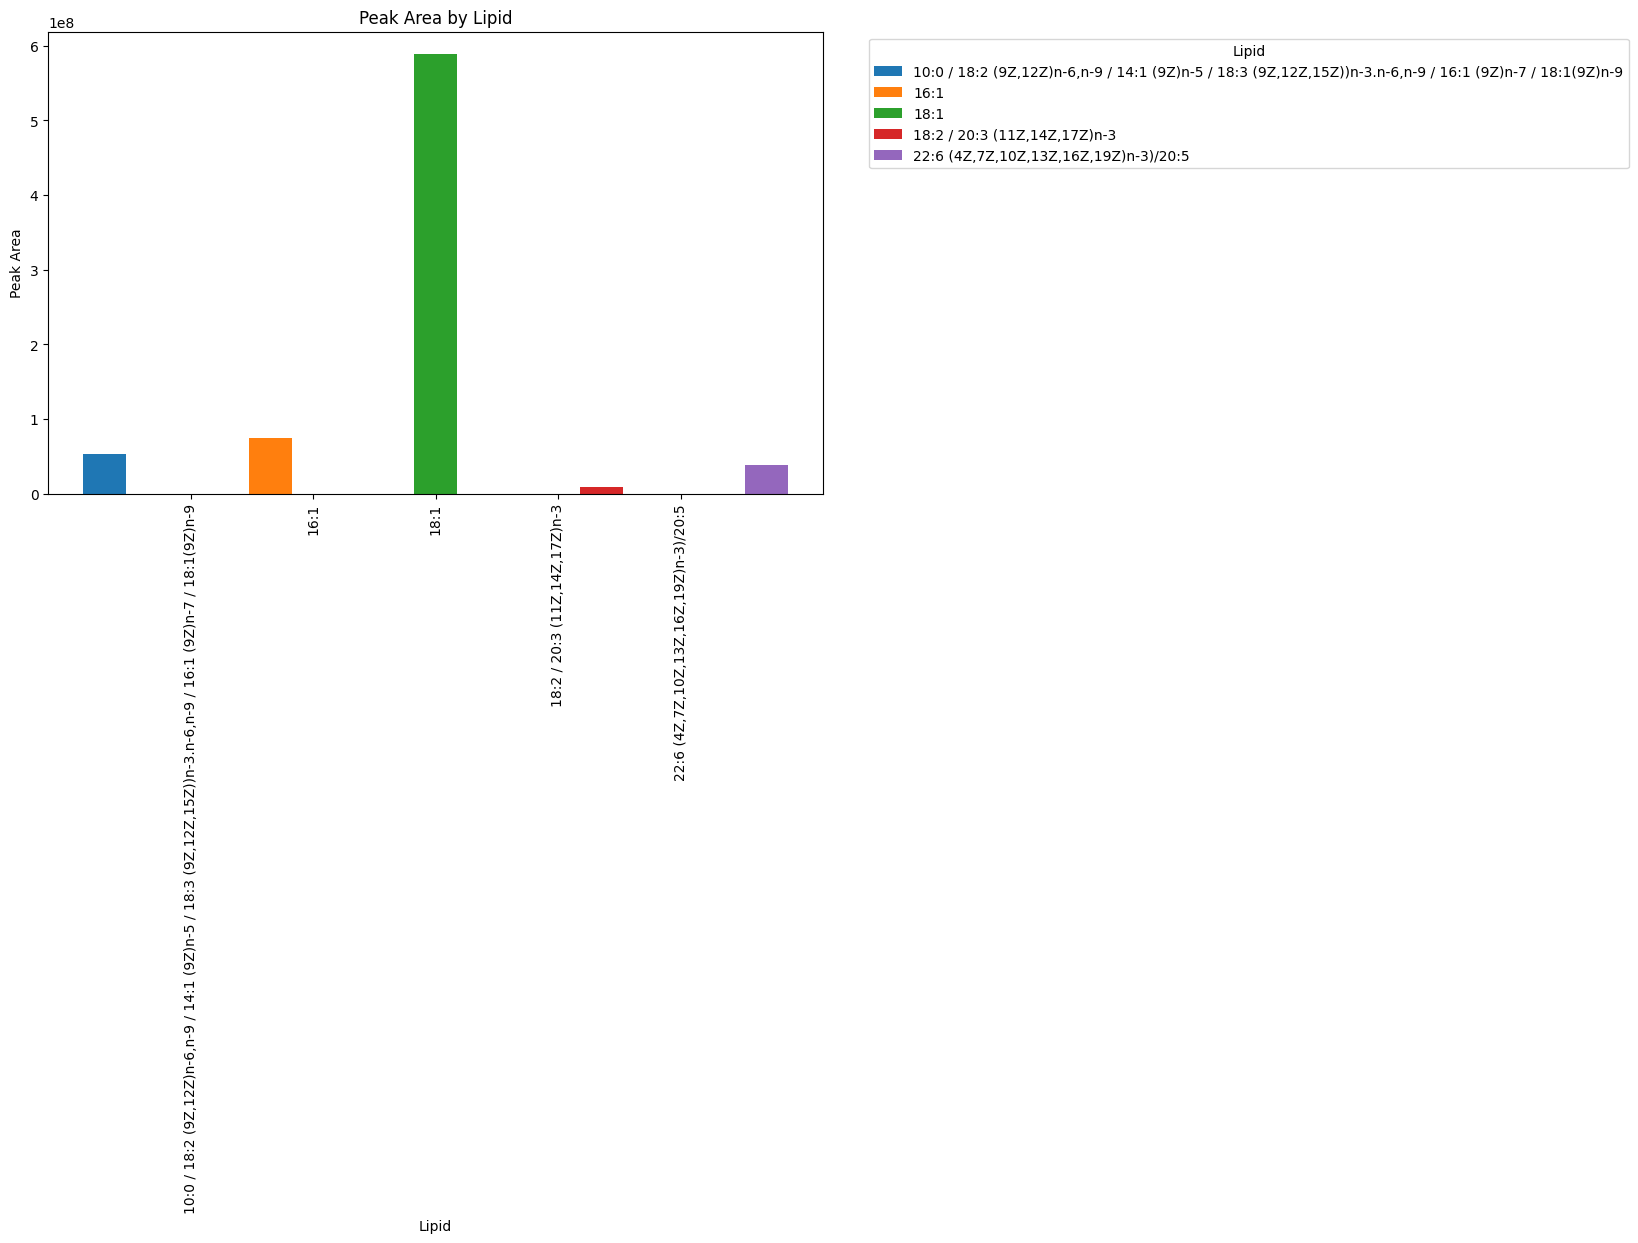

In [47]:
import OzESI_plot

# # Define the directory where the plots should be saved
# plots_directory = 'Projects/AMP/results/fame_mix/plots/on/'

# Create an instance of the Plot class with the specified directory
plot_instance = OzESI_plot.Plot(dataframe=filtered_df, plot_directory=plots_directory)

# Call the scatter method to plot data
plot_instance.scatter()

# Call the plot_bar method to display bar charts
plot_instance.plot_bar()

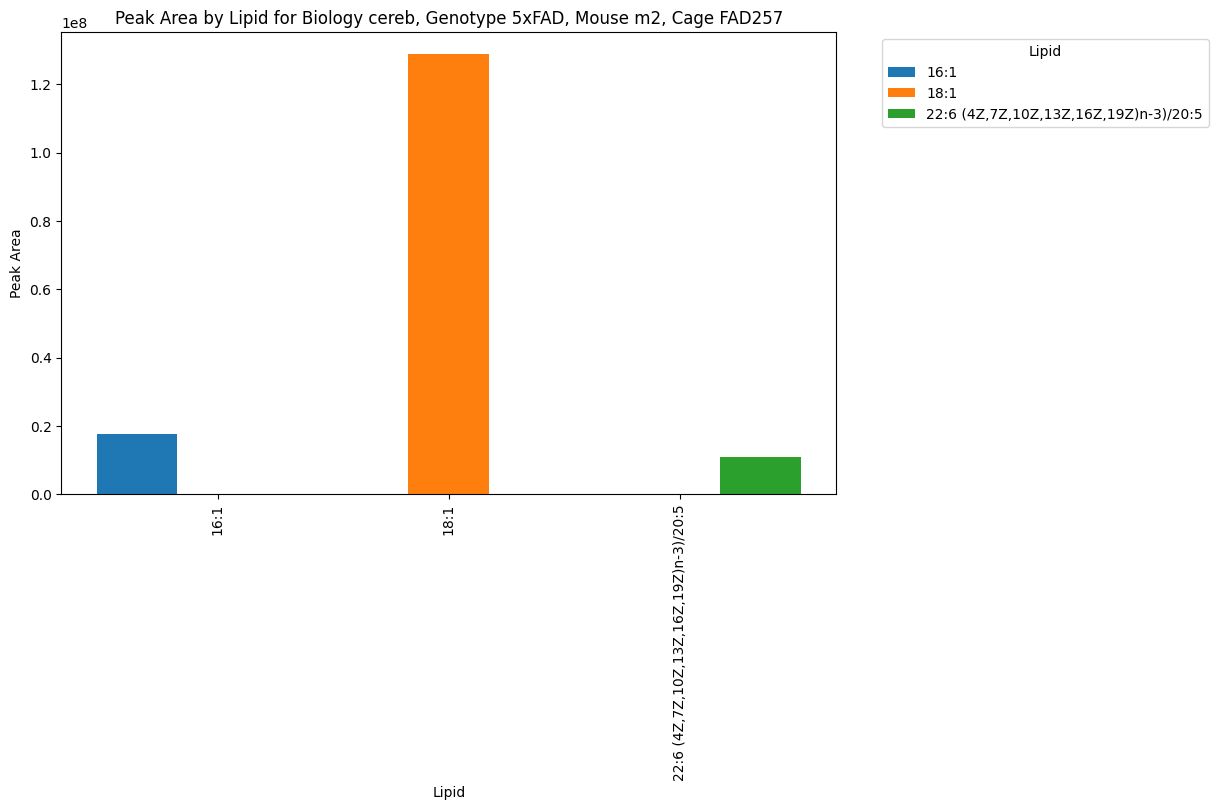

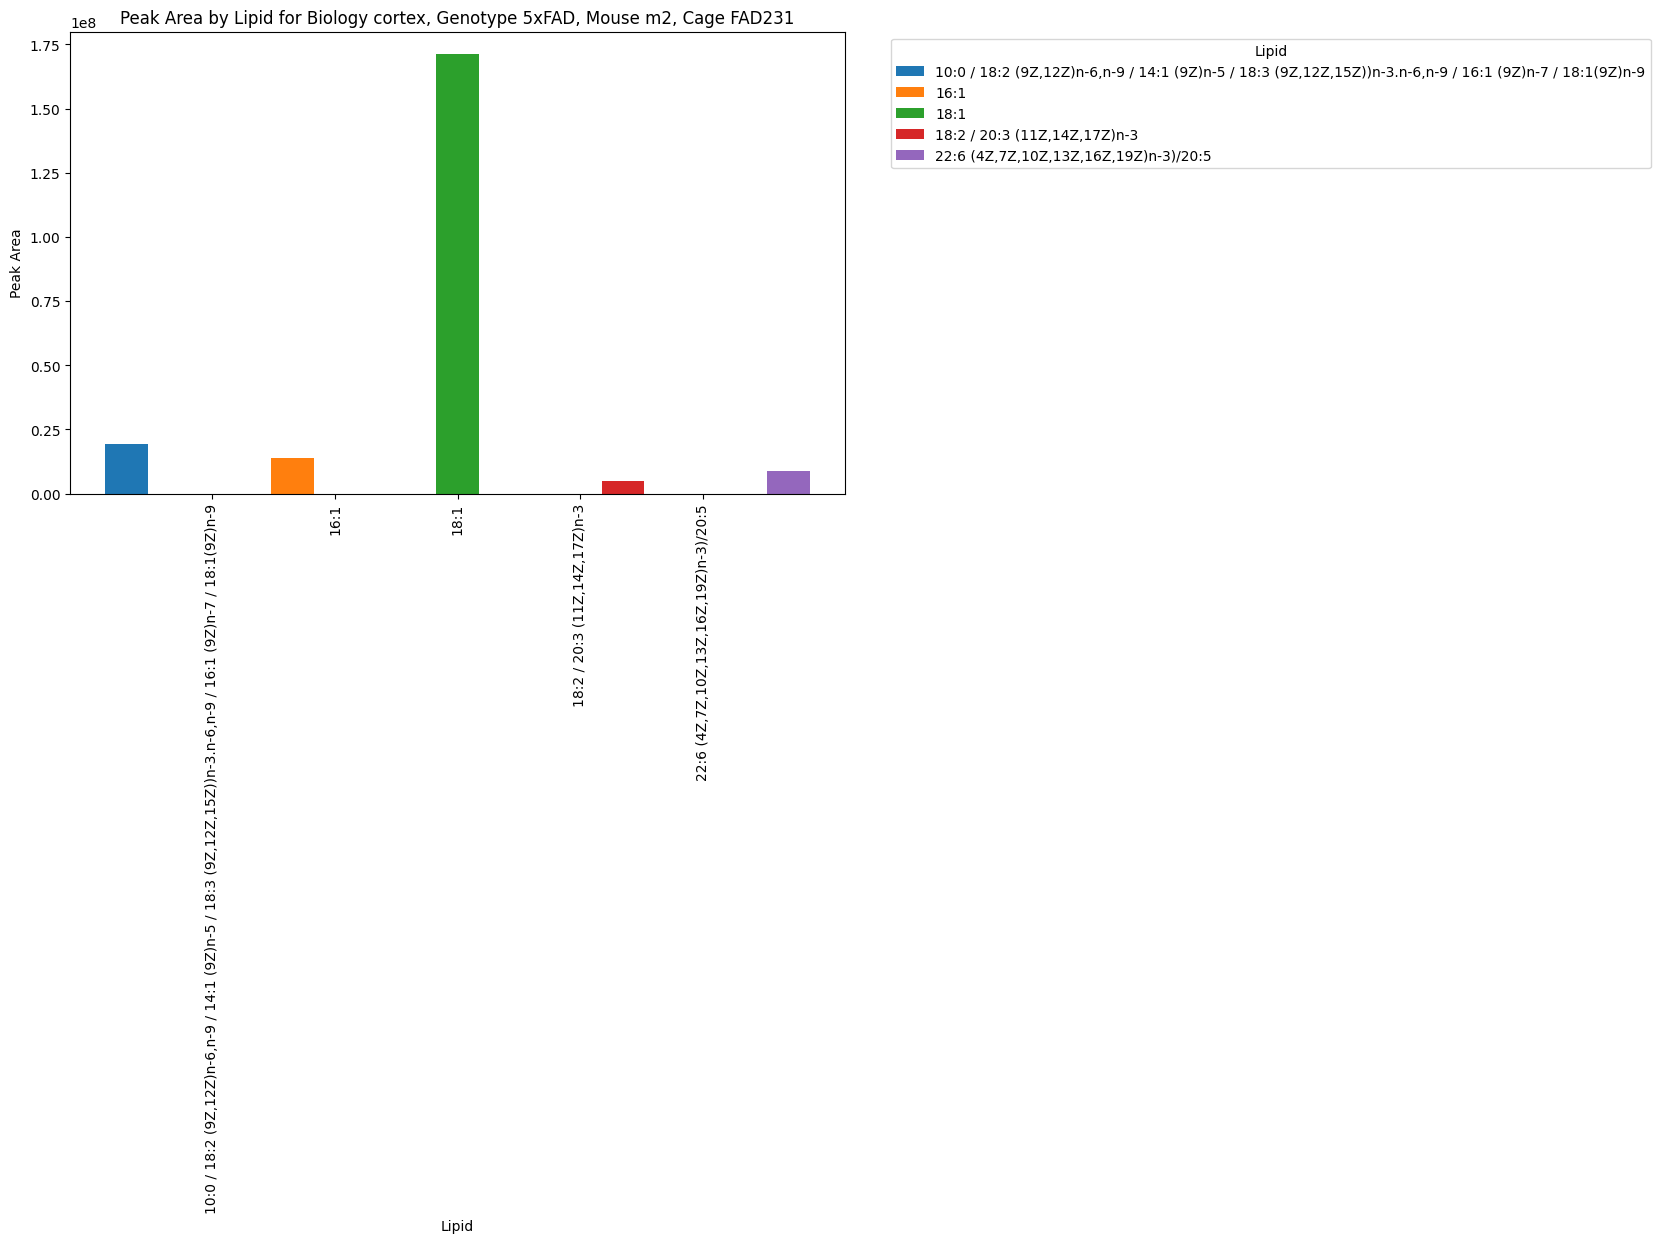

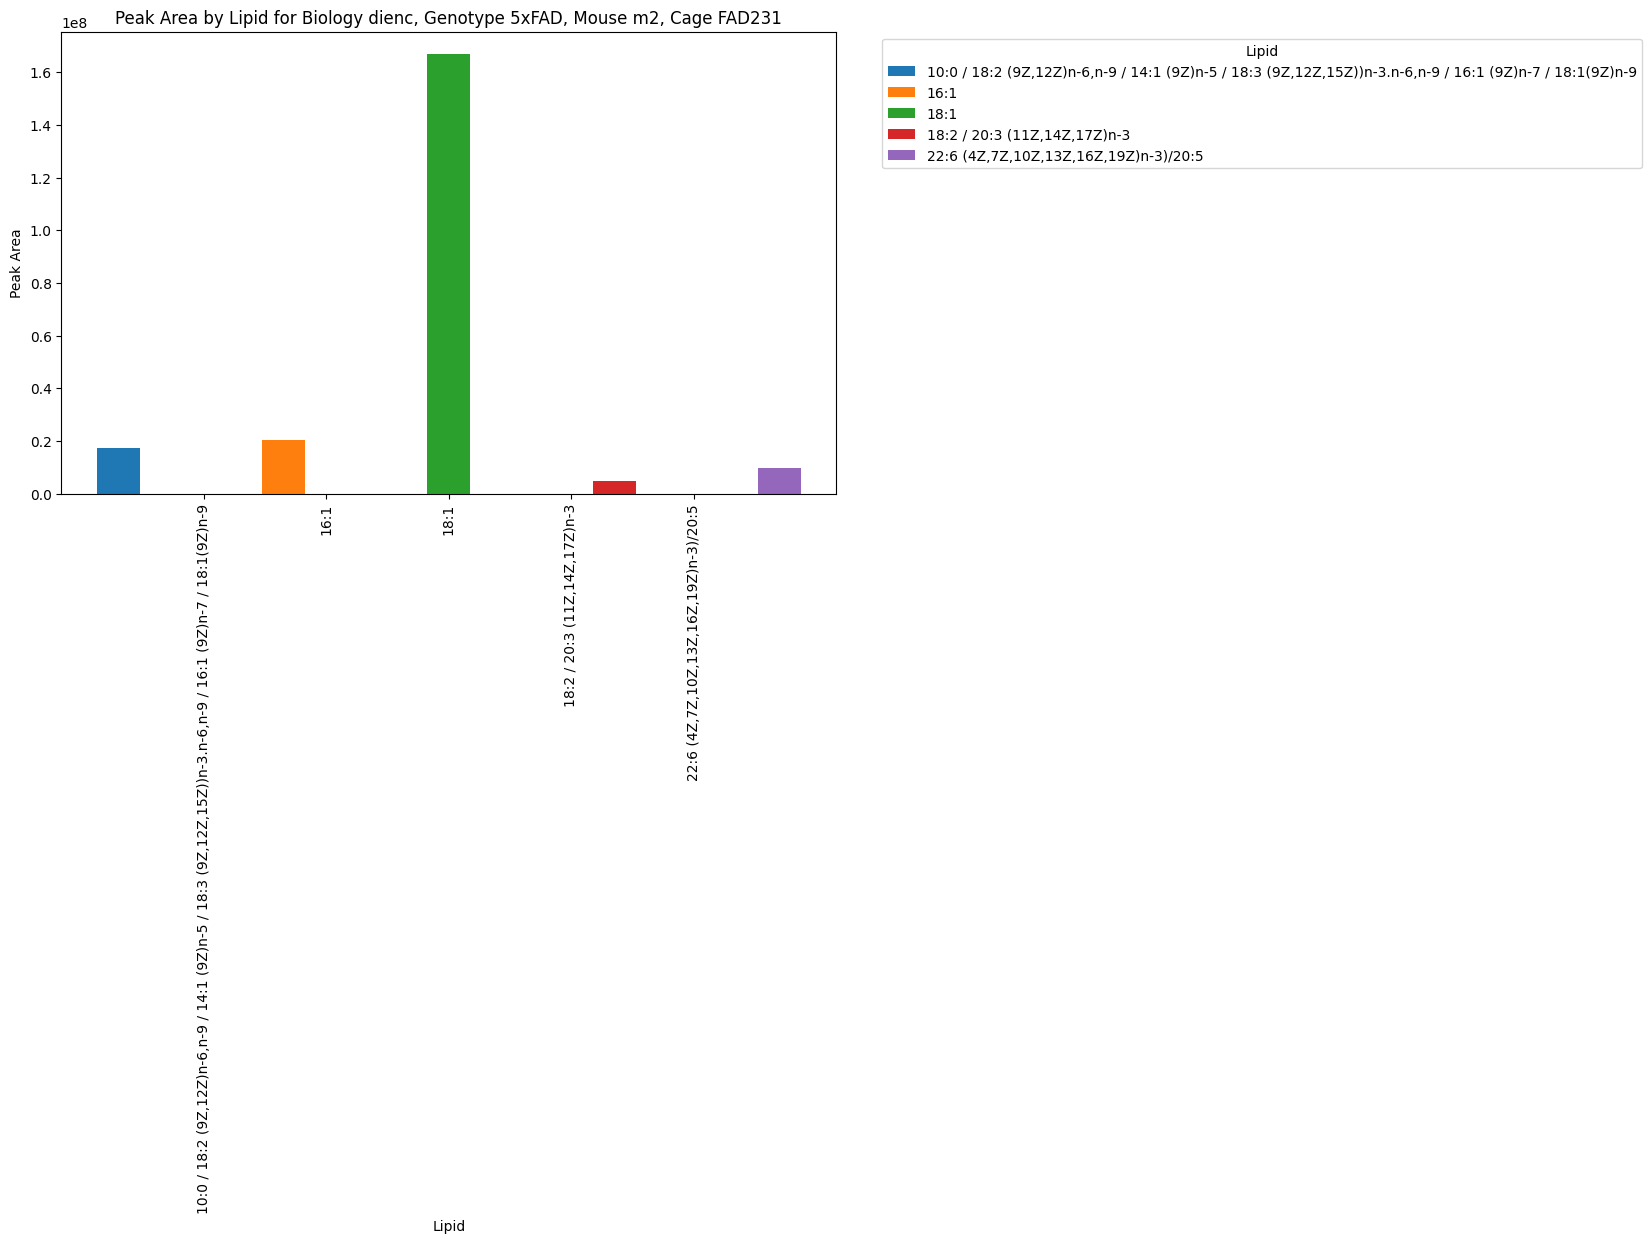

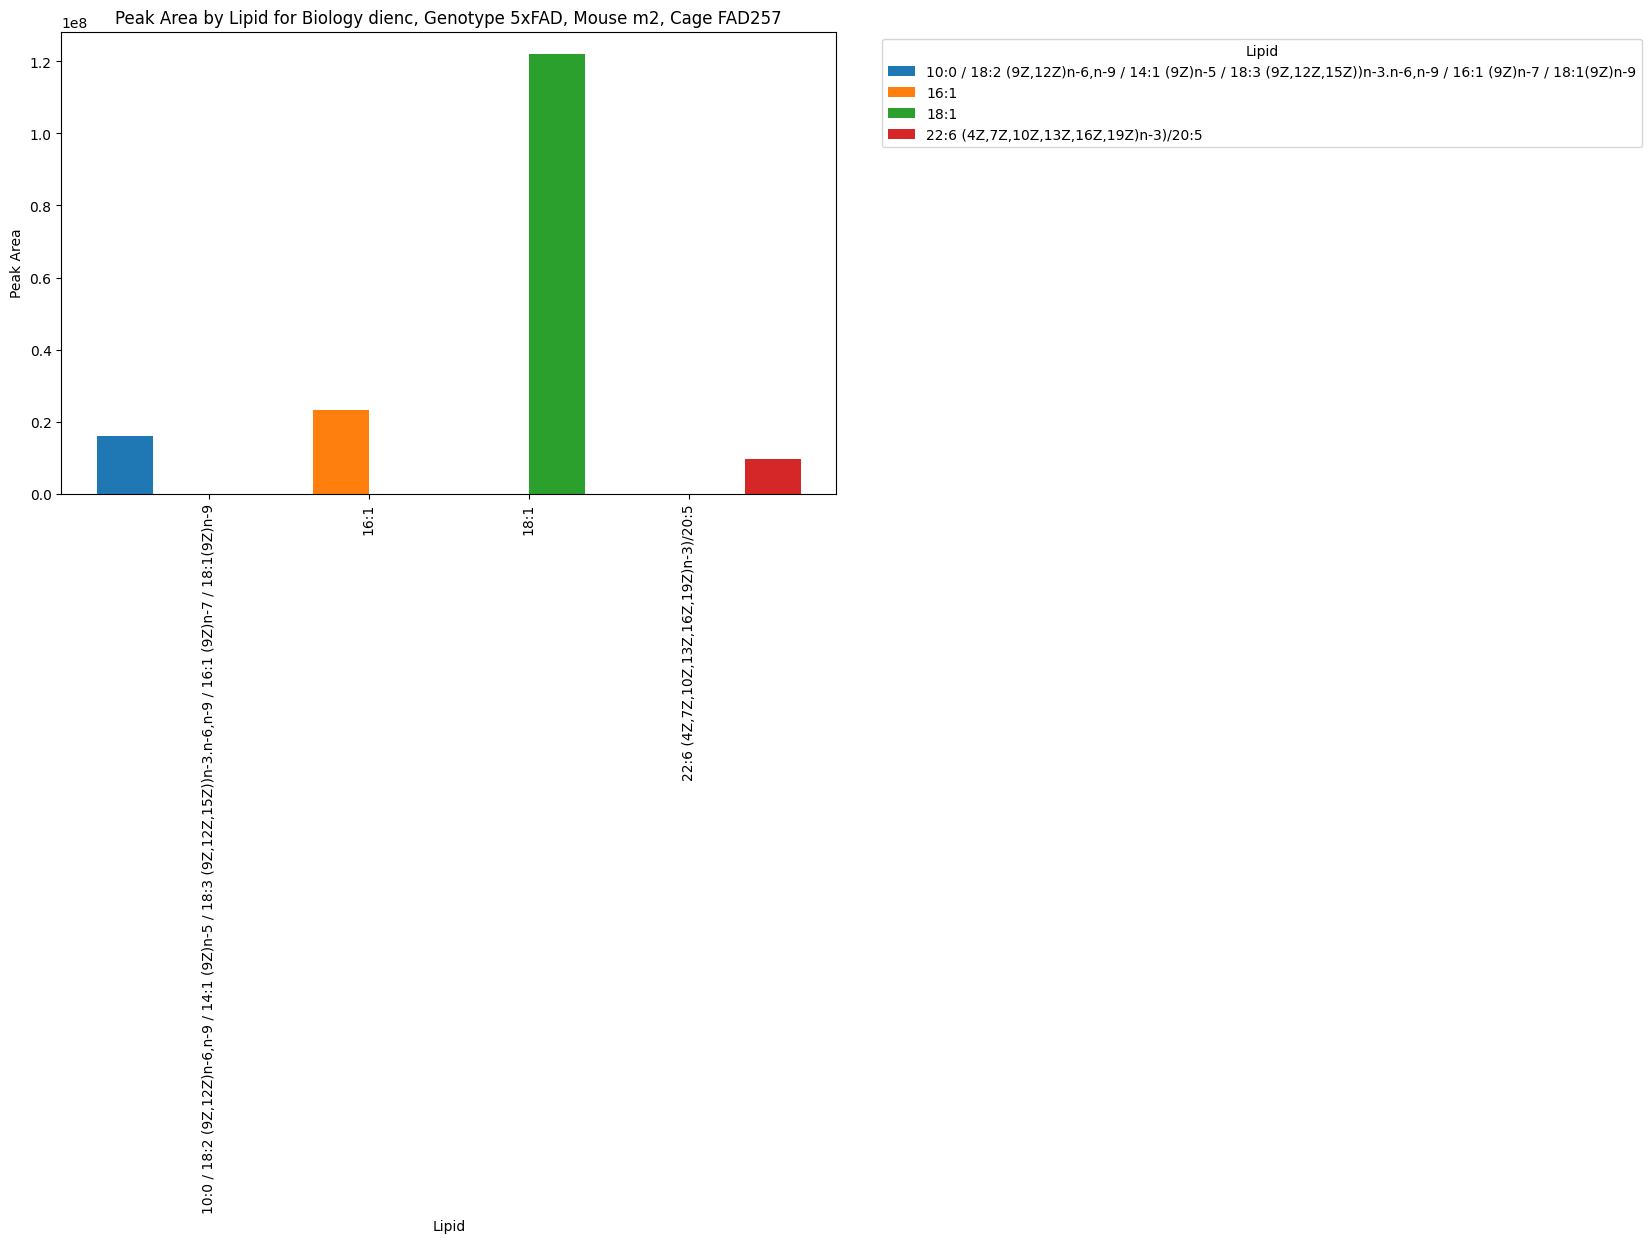

In [48]:


plot_instance.plot_bar_by_group_sample()

Directory already exists at Projects/AMP/results/test3/plots/on/


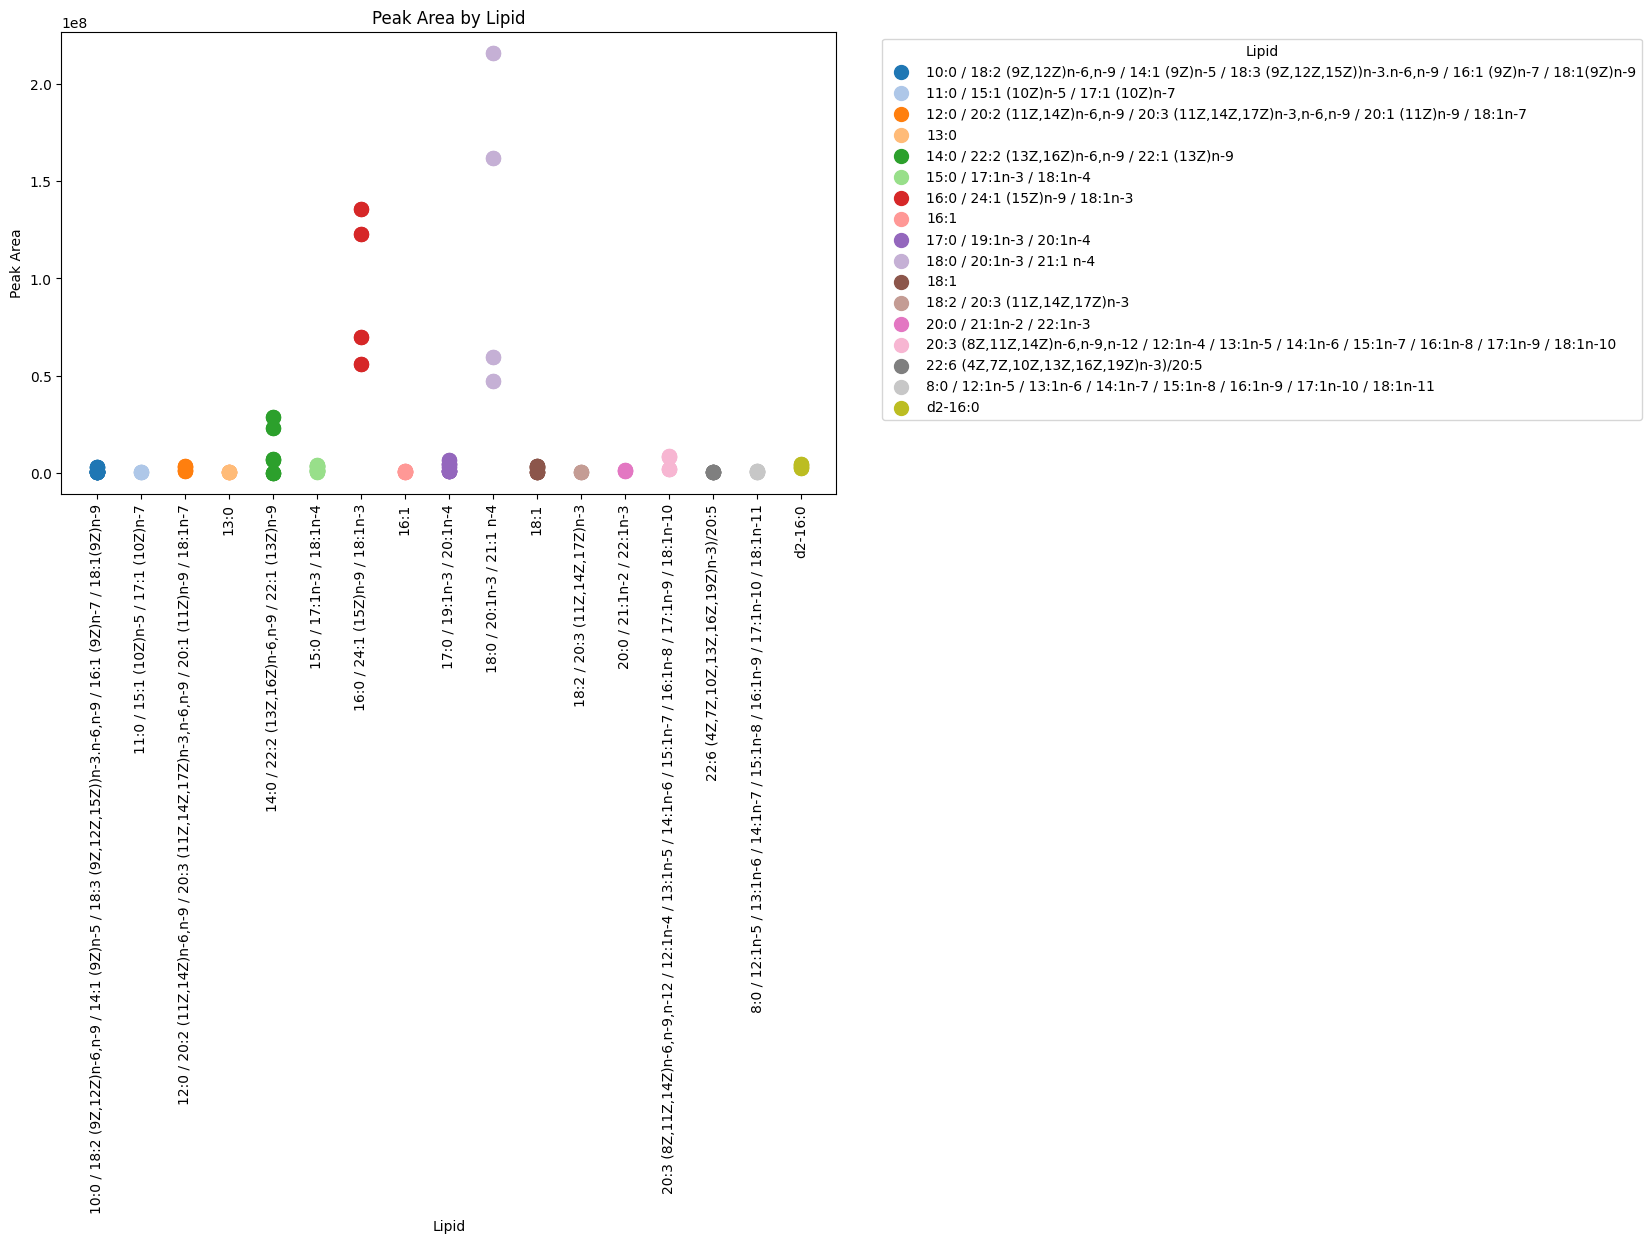

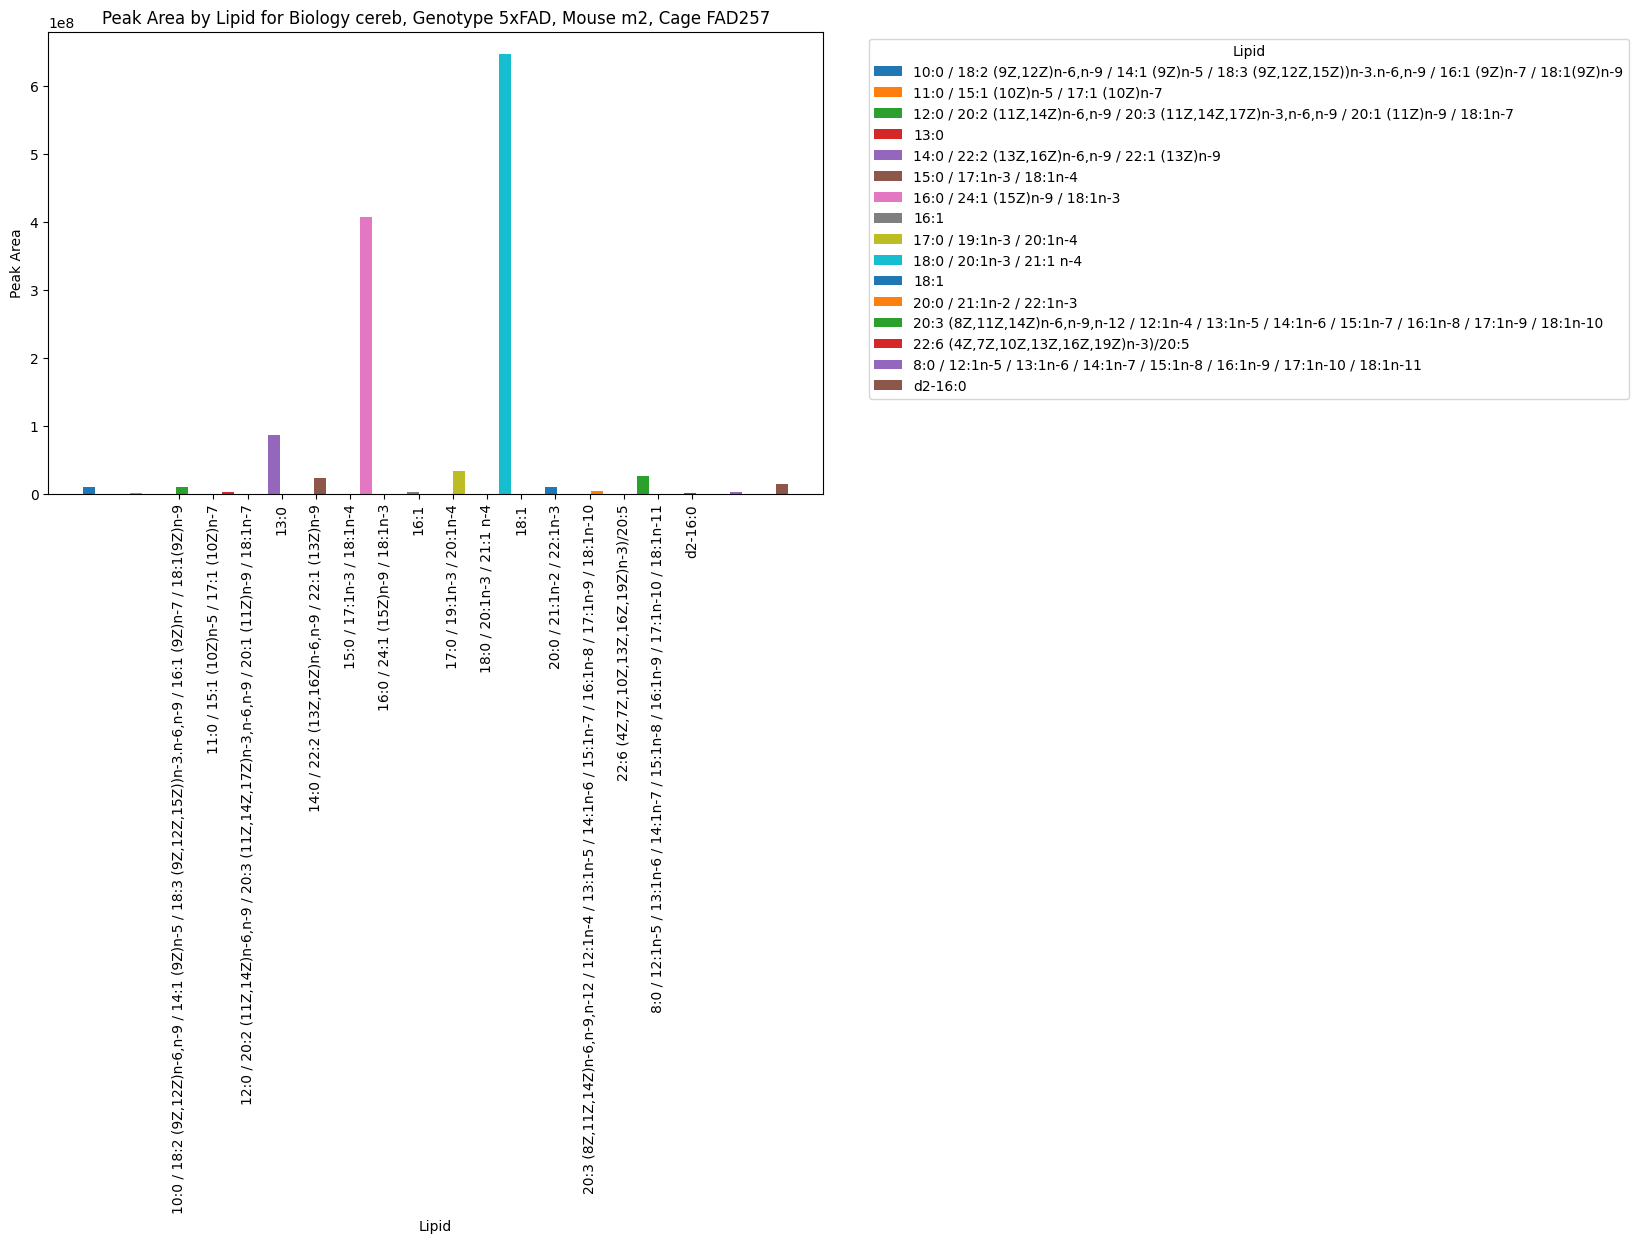

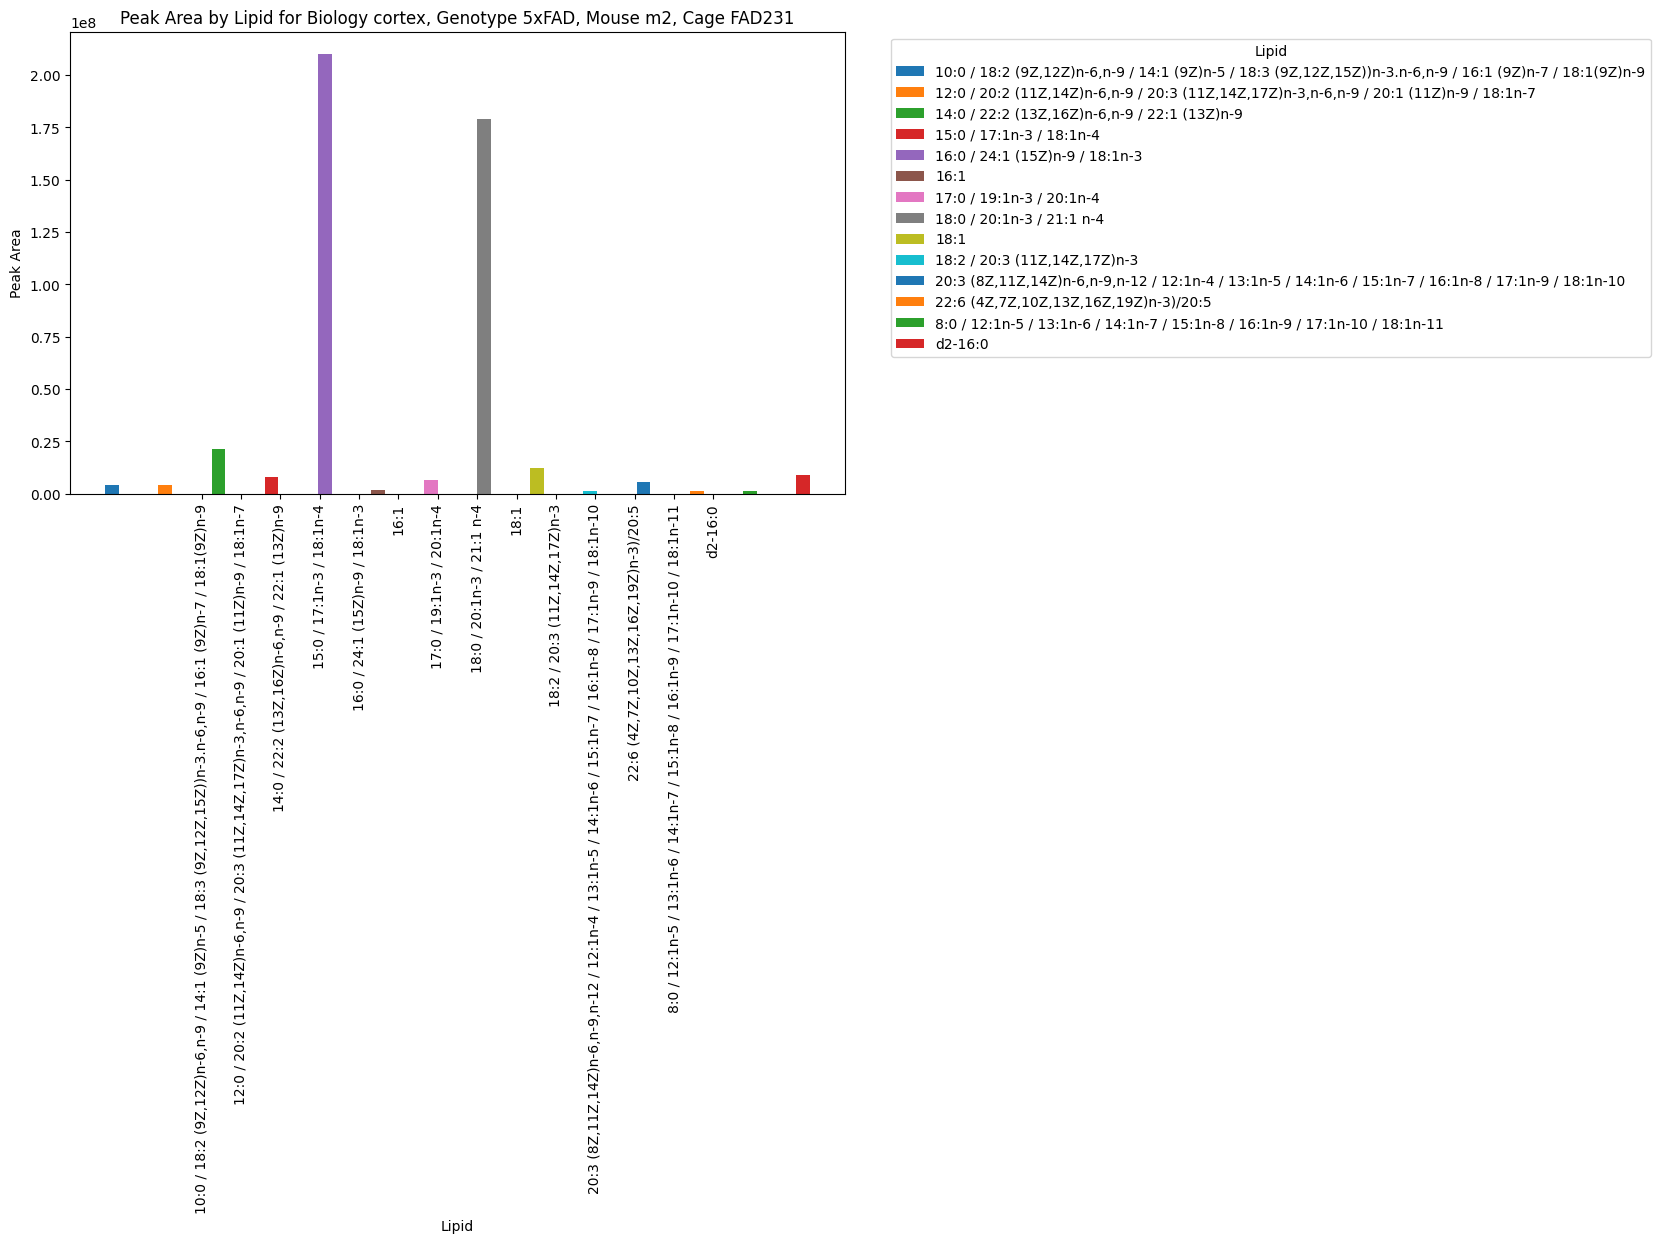

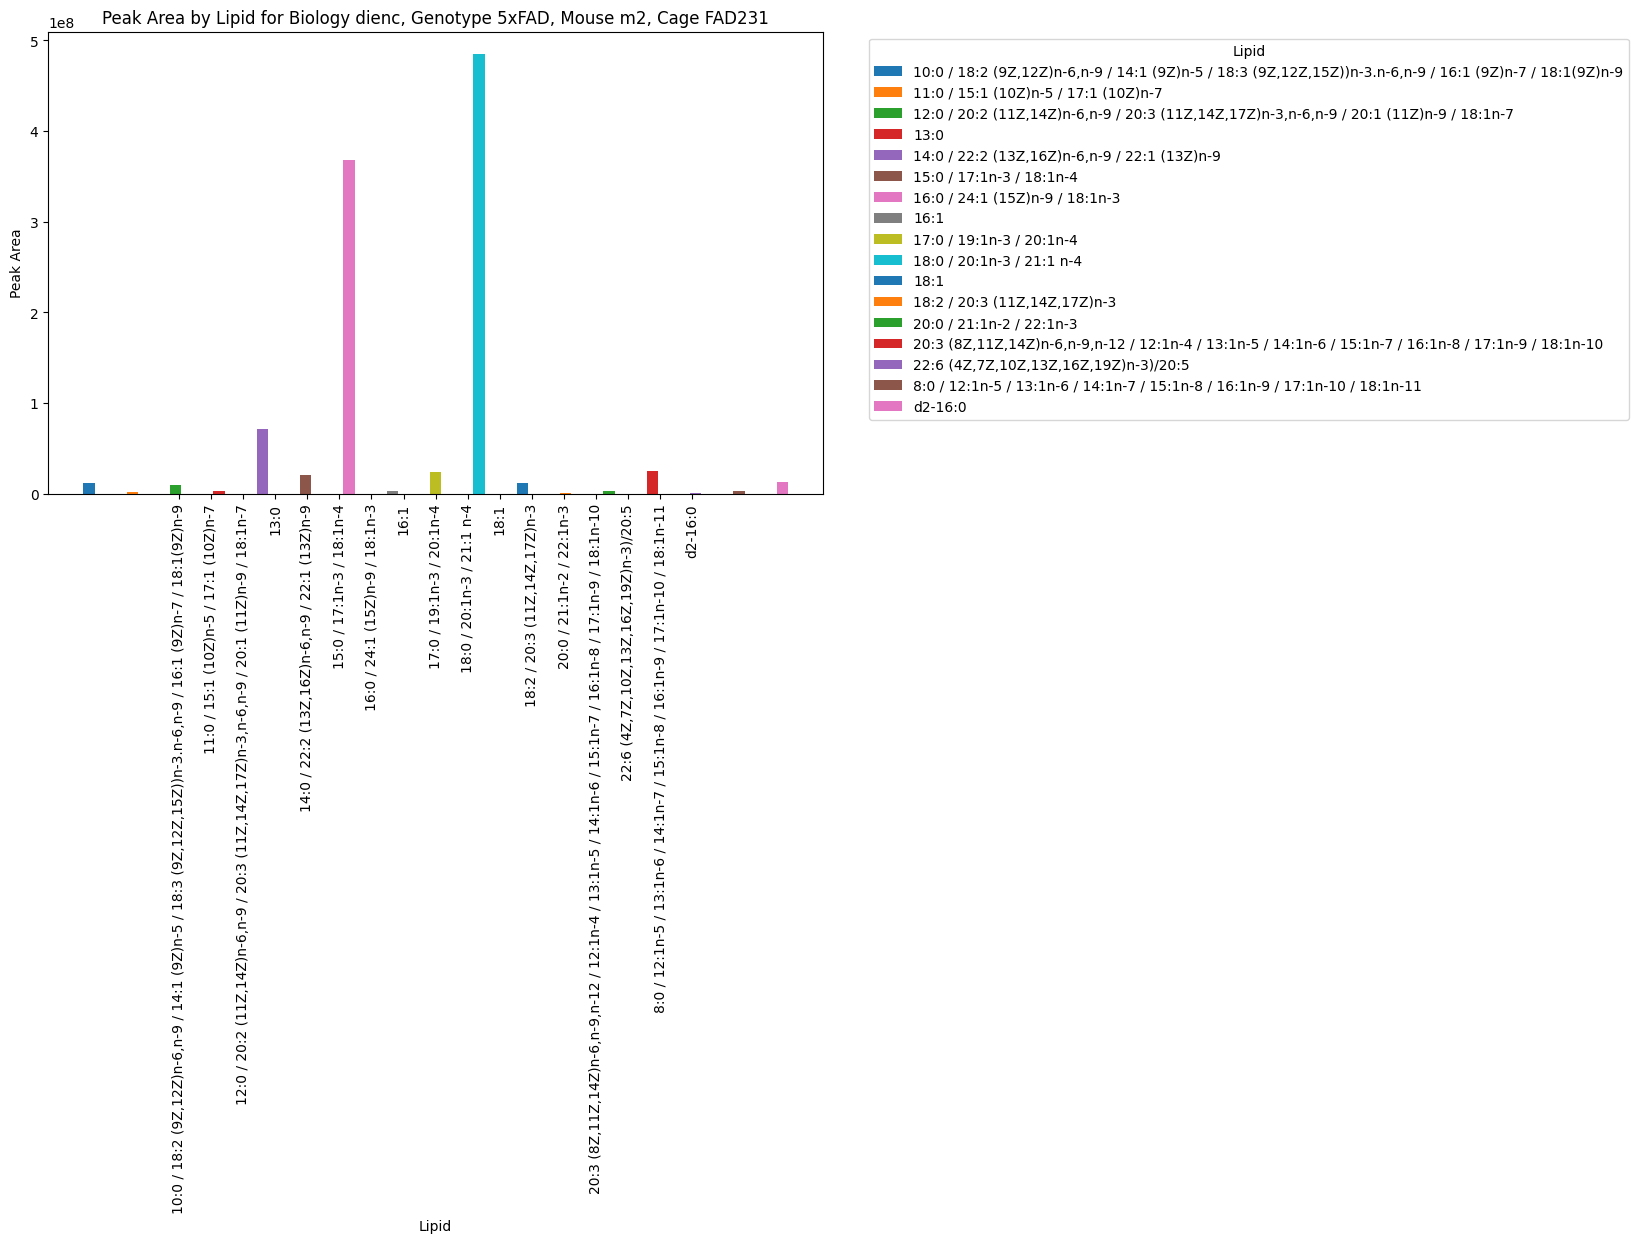

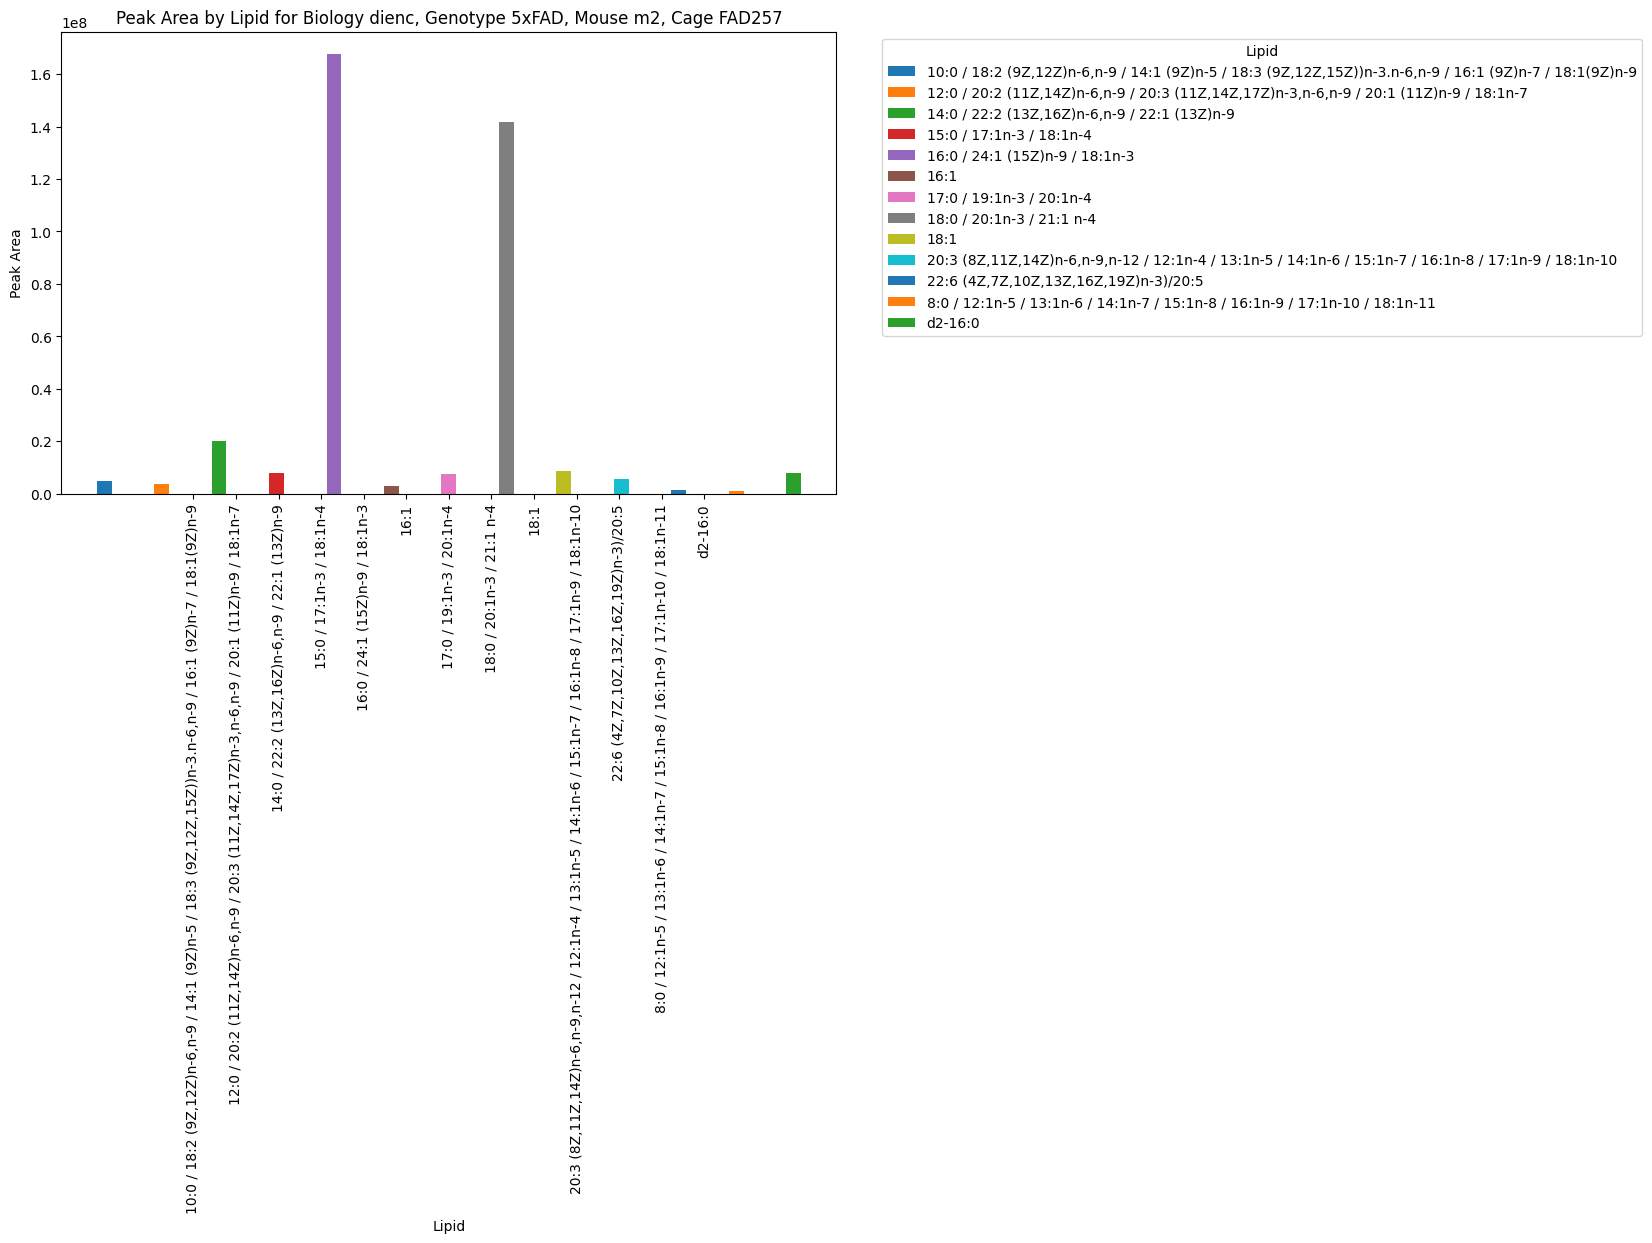

In [49]:
import OzESI_plot

# # Define the directory where the plots should be saved
# plots_directory = 'Projects/AMP/results/fame_mix/plots/on/'

# Create an instance of the Plot class with the specified directory
plot_instance = OzESI_plot.Plot(dataframe=peaks_df, plot_directory=plots_directory)

# Call the scatter method to plot data
plot_instance.scatter()


plot_instance.plot_bar_by_group_sample()

In [18]:
# OzESI_plot_v2.py

import os
import pandas as pd
import matplotlib.pyplot as plt

class Plott:
    def __init__(self, dataframe, plot_directory):
        self.dataframe = dataframe
        self.base_plot_directory = plot_directory
        self.ensure_directory_exists()

    def ensure_directory_exists(self):
        """Ensure the base directory for plots exists."""
        if not os.path.exists(self.base_plot_directory):
            os.makedirs(self.base_plot_directory)
            print(f"Directory created at {self.base_plot_directory}")
        else:
            print(f"Directory already exists at {self.base_plot_directory}")

    def generate_filename(self, lipid_name):
        """Generate a safe filename for saving plots based on the lipid name."""
        safe_lipid_name = lipid_name.replace("/", "-").replace(" ", "_").replace(":", "-")
        return f"{self.base_plot_directory}/{safe_lipid_name}_OzON.png"

    def scatter(self):
        """Create a scatter plot of Peak Area by Lipid."""
        grouped = self.dataframe.groupby('Lipid')
        fig, ax = plt.subplots(figsize=(10, 6))
        for (key, group), color in zip(grouped, plt.cm.tab20.colors):
            ax.scatter(group['Lipid'], group['Peak_Area'], label=str(key), color=color, s=100)

        ax.set_xlabel('Lipid')
        ax.set_ylabel('Peak Area')
        ax.set_title('Peak Area by Lipid')
        ax.set_xticks([i for i, _ in enumerate(grouped.groups.keys())])
        ax.set_xticklabels(grouped.groups.keys(), rotation='vertical')
        ax.legend(title='Lipid', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()

    def plot_bar(self):
        """Create a bar plot of Peak Area by Lipid."""
        grouped = self.dataframe.groupby('Lipid')
        fig, ax = plt.subplots(figsize=(10, 6))
        bar_width = 0.35
        num_groups = len(grouped.groups.keys())
        indices = list(range(num_groups))

        for i, (key, group) in enumerate(grouped):
            positions = [x + bar_width * i for x in indices]
            normalized_peak_areas = [group[group['Lipid'] == lipid]['Peak_Area'].sum() for lipid in grouped.groups.keys()]
            ax.bar(positions, normalized_peak_areas, width=bar_width, label=str(key))

        ticks_positions = [i + bar_width * (num_groups / 2) - bar_width / 2 for i in indices]
        ax.set_xticks(ticks_positions)
        ax.set_xticklabels(grouped.groups.keys(), rotation='vertical')
        ax.set_xlabel('Lipid')
        ax.set_ylabel('Peak Area')
        ax.set_title('Peak Area by Lipid')
        ax.legend(title='Lipid', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()

    def plot_bar_by_group_sample(self):
        """Create bar plots of Peak Area by Lipid for each combination of Biology, Genotype, Mouse, and Cage."""
        group_cols = ['Biology', 'Genotype', 'Mouse', 'Cage']
        unique_groups = self.dataframe[group_cols].drop_duplicates()

        for _, group in unique_groups.iterrows():
            # Filter the dataframe for the current group combination
            group_filter = (self.dataframe['Biology'] == group['Biology']) & \
                           (self.dataframe['Genotype'] == group['Genotype']) & \
                           (self.dataframe['Mouse'] == group['Mouse']) & \
                           (self.dataframe['Cage'] == group['Cage'])
            group_df = self.dataframe[group_filter]

            # Group by 'Lipid'
            grouped = group_df.groupby('Lipid')
            fig, ax = plt.subplots(figsize=(10, 6))
            bar_width = 0.35
            num_groups = len(grouped.groups.keys())
            indices = list(range(num_groups))

            for i, (key, group_data) in enumerate(grouped):
                positions = [x + bar_width * i for x in indices]
                # Sum the peak areas for each lipid
                normalized_peak_areas = [group_data[group_data['Lipid'] == lipid]['Peak_Area'].sum() for lipid in grouped.groups.keys()]
                ax.bar(positions, normalized_peak_areas, width=bar_width, label=str(key))

            ticks_positions = [i + bar_width * (num_groups / 2) - bar_width / 2 for i in indices]
            ax.set_xticks(ticks_positions)
            ax.set_xticklabels(grouped.groups.keys(), rotation='vertical')
            ax.set_xlabel('Lipid')
            ax.set_ylabel('Peak Area')
            title = f'Peak Area by Lipid for Biology {group["Biology"]}, Genotype {group["Genotype"]}, Mouse {group["Mouse"]}, Cage {group["Cage"]}'
            ax.set_title(title)
            ax.legend(title='Lipid', bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.show()


Directory already exists at ./Projects/AMP/results/fame_mix/plots/on/


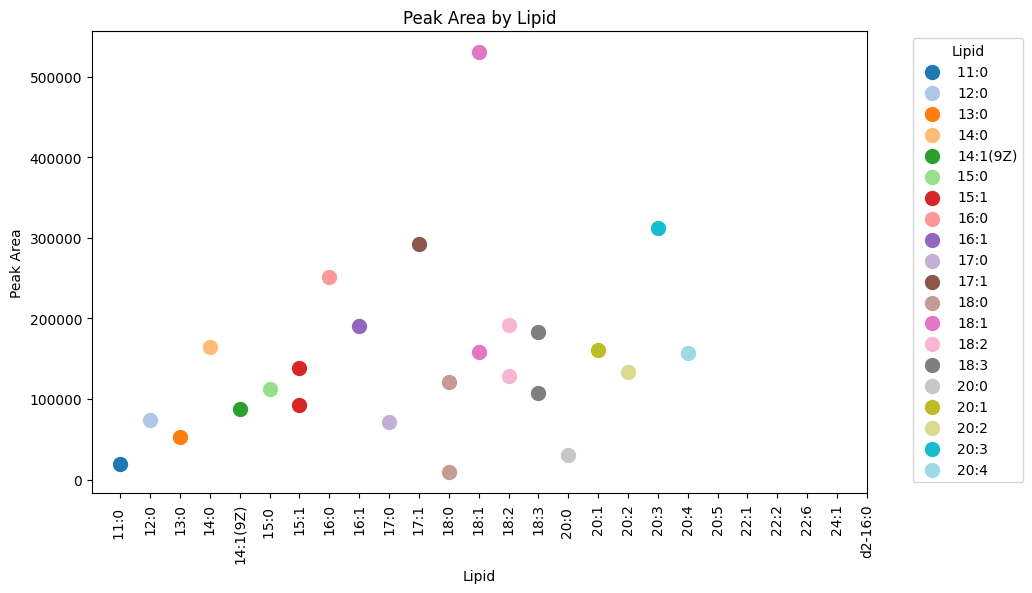

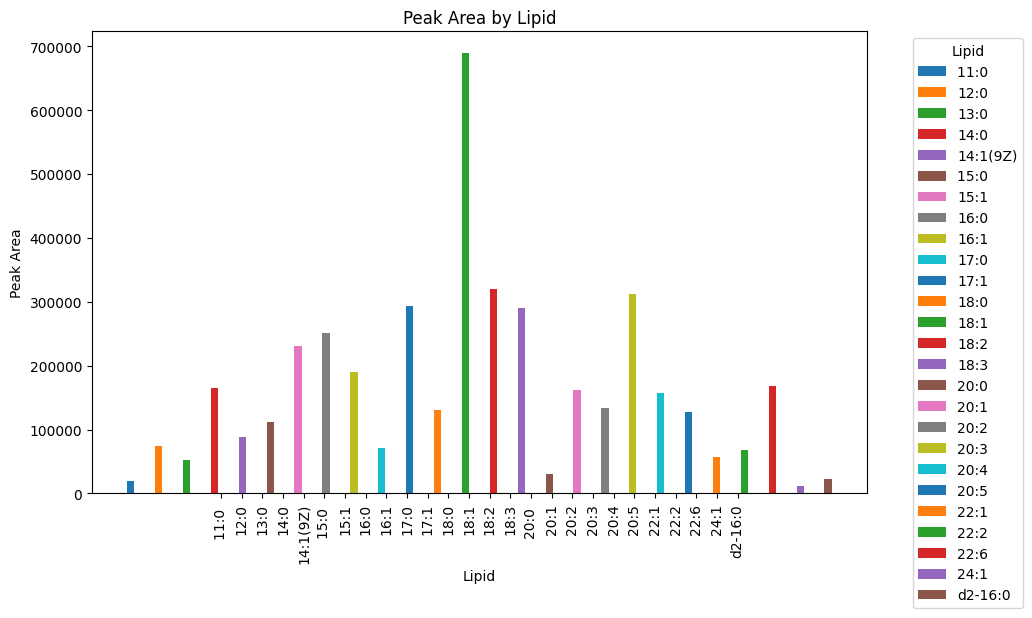

No handles with labels found to put in legend.


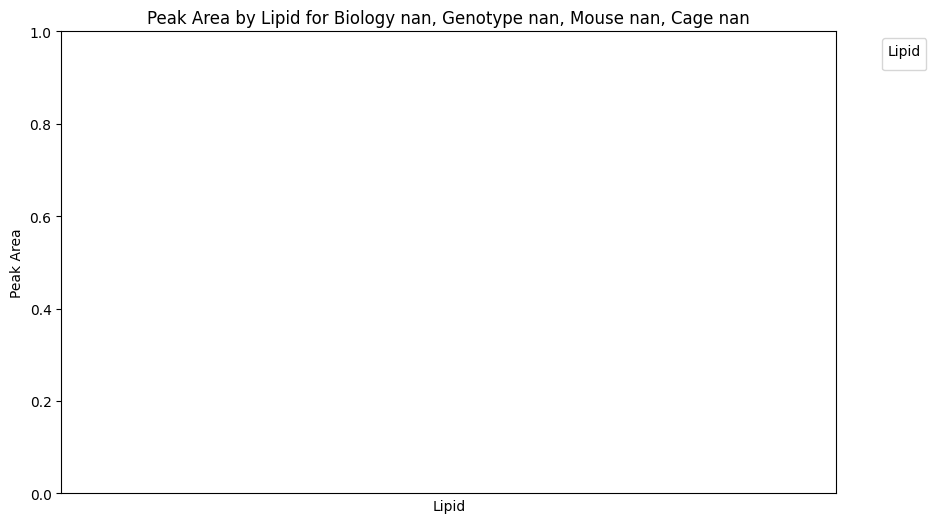

In [19]:

# Load one of the CSV files into a DataFrame
dataframe_choice = 'peak_analysis'  # or 'ozone_compare' based on user selection

if dataframe_choice == 'peak_analysis':
    dataframe = pd.read_csv(peak_analysis_csv)
elif dataframe_choice == 'ozone_compare':
    dataframe = pd.read_csv(ozone_compare_csv)
else:
    raise ValueError("Invalid dataframe choice")

# Specify the directory for saving plots
plot_directory = f'./Projects/{Project_Name}/results/fame_mix/plots/on/'

# Create a Plot instance
plot_instance = Plott(dataframe, plot_directory)

# Generate and display plots
plot_instance.scatter()
plot_instance.plot_bar()
plot_instance.plot_bar_by_group_sample()